<a href="https://colab.research.google.com/github/vicaaa12/advanced-machine-learning/blob/main/Credit_Card_Users_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# This will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    confusion_matrix,

)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/advancedmachinelearning/project2/BankChurners.csv'

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.shape

(10127, 21)

* The dataset has 10127 rows and 21 columns

## Data Overview

- Observations
- Sanity checks

In [ ]:
#Create copy of the data
df = data.copy()

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_


* 'CLIENTNUM' is not providing any meaningful information for analysis. If it's  a unique identifier, it might be beneficial to drop this column for modeling or analysis
* Education_Level' and 'Marital_Status' are categorical variables with some missing values.

In [ ]:
#checking for duplicates
df.duplicated().sum()

0

* There is no duplicates in the data

In [ ]:
#checking for missing values
round(df.isnull().sum() / df.isnull().count() * 100, 2)

CLIENTNUM                   0.000
Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

* Educational Level has 15% missing values of the total observations
* Marital Status column has 7.4% missing values out of the total observations

In [ ]:
# checking statistic summary of the numarical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


* Clientnum is unuque column and doesn't add any meaning to the analysis and can be dropped
*     On average, customers have approximately 2 dependents. The range of dependent counts varies from 0 to 5, with most customers having 1 to 3 dependents.
*     On average, customers make around 65 transactions. The range of transaction counts is from 10 to 139.
*     On average, customers have been inactive for around 2 months in the last 12 months. The range of months inactive varies from 0 to 6.
*     The average customer age is around 46 years.
    Customers in the dataset have an age range from 26 to 73 years.
    The majority of customers (50th percentile) are around 46 years old.

In [ ]:
# list of all categorical variables
cat_col = df.columns
for i in cat_col:
  if data[i].dtype == 'object':
    print(df[i].value_counts(normalize=True))
    print("-" * 50)

Existing Customer   0.839
Attrited Customer   0.161
Name: Attrition_Flag, dtype: float64
--------------------------------------------------
F   0.529
M   0.471
Name: Gender, dtype: float64
--------------------------------------------------
Graduate        0.363
High School     0.234
Uneducated      0.173
College         0.118
Post-Graduate   0.060
Doctorate       0.052
Name: Education_Level, dtype: float64
--------------------------------------------------
Married    0.500
Single     0.420
Divorced   0.080
Name: Marital_Status, dtype: float64
--------------------------------------------------
Less than $40K   0.352
$40K - $60K      0.177
$80K - $120K     0.152
$60K - $80K      0.138
abc              0.110
$120K +          0.072
Name: Income_Category, dtype: float64
--------------------------------------------------
Blue       0.932
Silver     0.055
Gold       0.011
Platinum   0.002
Name: Card_Category, dtype: float64
--------------------------------------------------


* The "Income_Category" column includes values labeled as "abc."
* The dataset consists of existing customers (83.9%) compared to attrited customers (16.1%).This is imbalanced dataset
*     The majority of customers hold a Blue card (93.2%).
    Silver, Gold, and Platinum cards are less common, with frequencies of 5.5%, 1.1%, and 0.2%, respectively.
* The most common income category is "Less than $40K" (35.2%).

In [ ]:
#Let's drop  CLIENTNUM
df.drop(['CLIENTNUM'], axis = 1, inplace=True)

In [ ]:
#checking result
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
#Encoding 0 and 1 to 'Existing Customer' and 'Attrited Customer' respectively, for analysis
df['Attrition_Flag'].replace("Existing Customer", 0, inplace = True)
df['Attrition_Flag'].replace('Attrited Customer', 1, inplace = True)

In [ ]:
#checking results
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

####Customer age

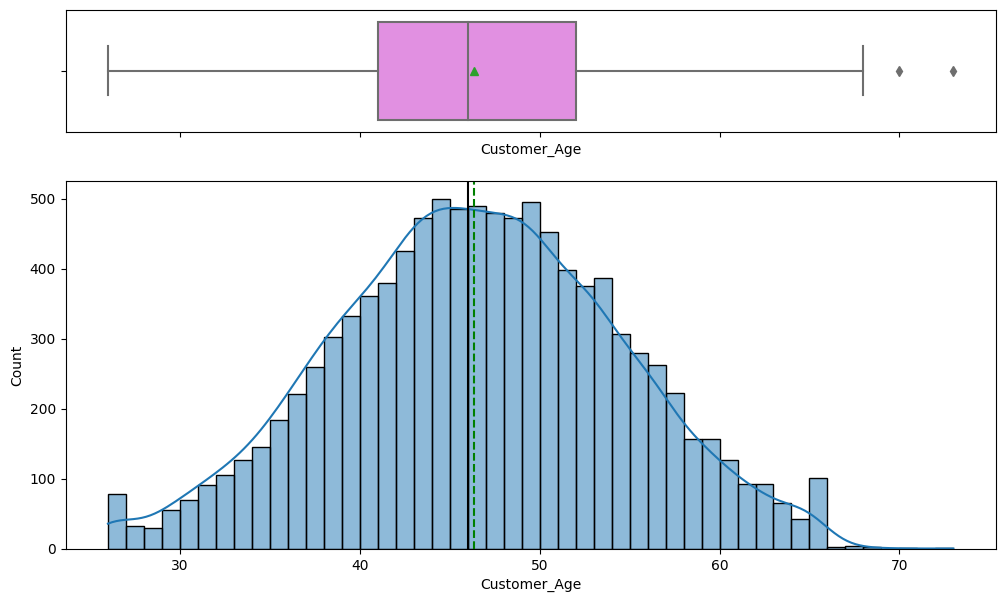

In [ ]:
histogram_boxplot(df, 'Customer_Age', kde =True)

* Customer age column is almost equally distributed
* The median age is approximately 56
* 75% of customers are aged 52 years or younger.
* There are few outliers

Months on books

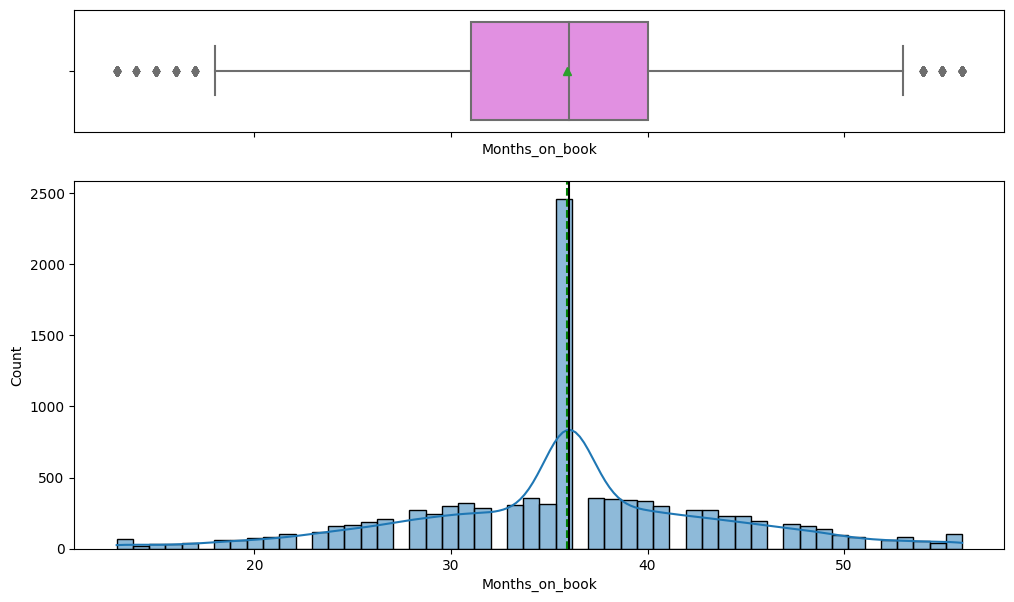

In [ ]:
histogram_boxplot(df, 'Months_on_book', kde =True)

* The average duration of customer relationships ("Months_on_book") is approximately 36 months.
* 75% of customers have a relationship duration of 40 months or less
* The longest customer relationship duration is 56 months
* Outliers are present on either end of the distribution

Credit Limit

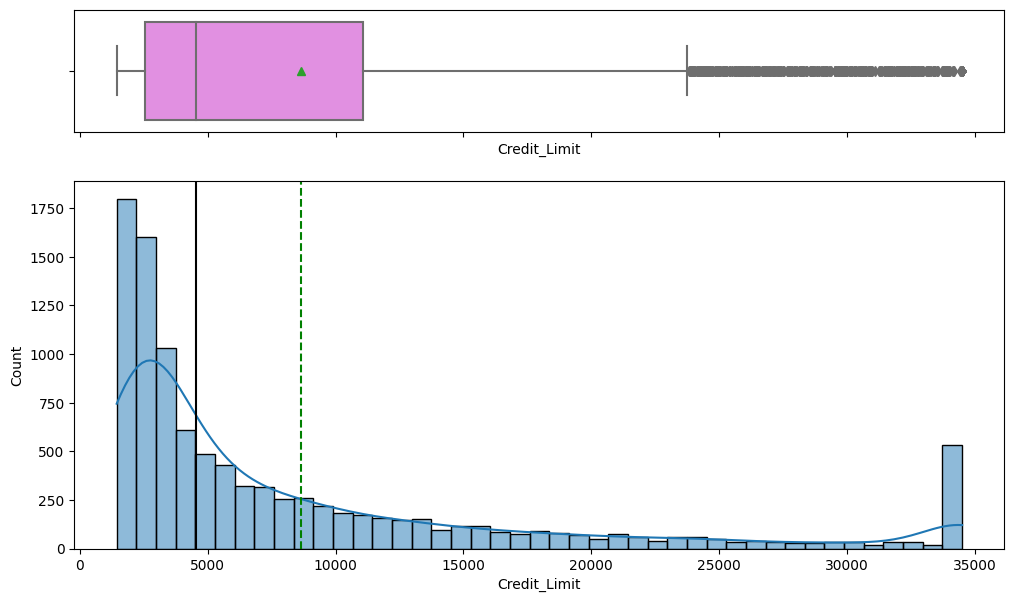

In [ ]:
histogram_boxplot(df, 'Credit_Limit', kde =True)

* The distribution of "Credit_Limit" is right-skewed, indicating a concentration of values towards the lower end with numerous outliers on the higher side.
* 75% of customers have a credit limit of $11,067.50 or lower

* 25% of customers have a credit limit of $2,555.00 or lower

Total Revolving Balance

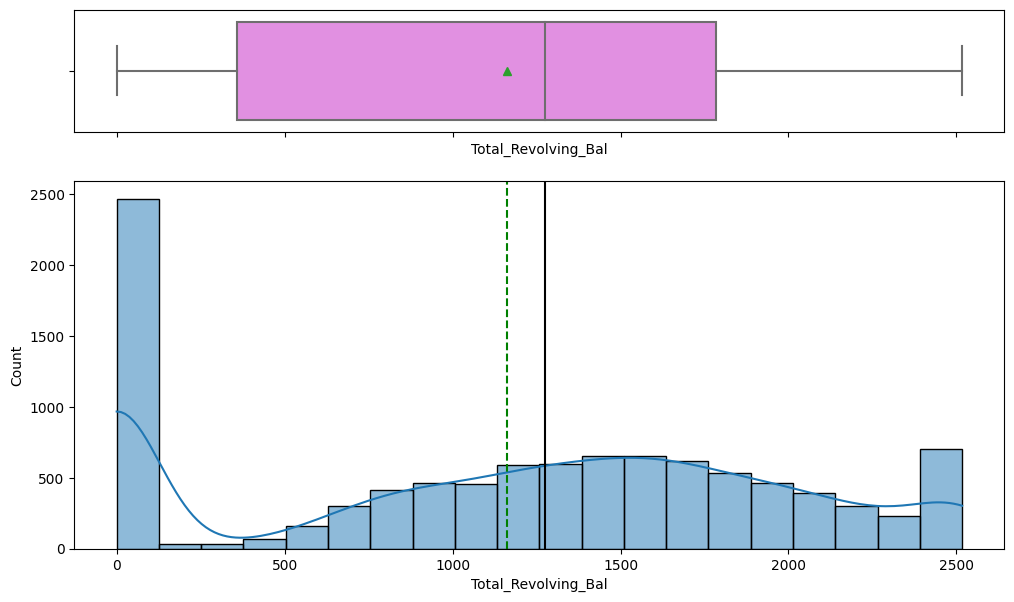

In [ ]:
histogram_boxplot(df, 'Total_Revolving_Bal', kde =True)

* The smallest revolving balance is 0,  indicating instances where customers have fully paid off their revolving balances
* 75% of customers have a revolving balance of $1,784.00 or lower

* The highest revolving balance is $2,517.00

Avg Open To Buy

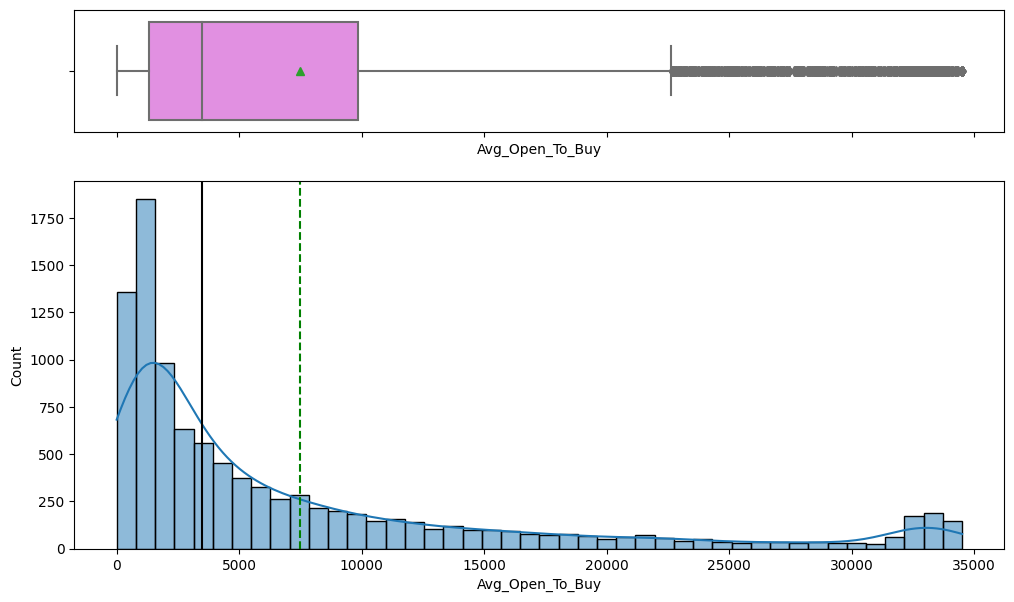

In [ ]:
histogram_boxplot(df, 'Avg_Open_To_Buy', kde =True)

* Avg open to buy is right-skewed with many outliers on the high end
* The average available credit for purchasing is $7,469.14.

* The smallest available credit is $3.00, suggesting instances where customers have very limited credit.

*  75% of customers have available credit of $9,859.00 or lower.

* The highest available credit is $34,516.00.

Total Trans Ct

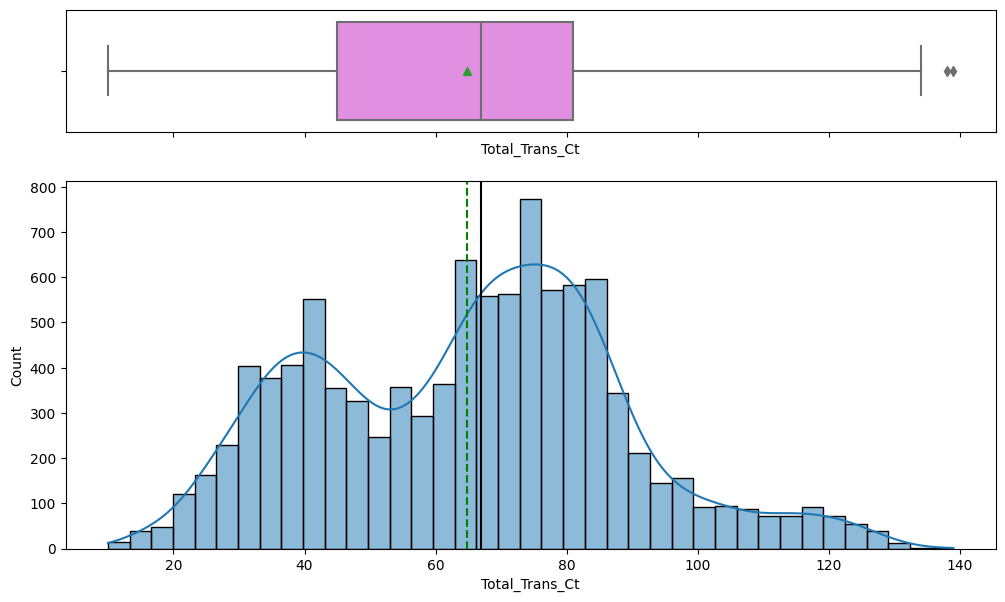

In [ ]:
histogram_boxplot(df, 'Total_Trans_Ct', kde =True)

* The average number of total transactions is approximately 64.86, with a considerable spread indicated by the standard deviation of 23.47. The minimum and maximum values suggest a range from 10 to 139 transactions.
* There are few outliers in this variable on the high end

Total Amt Chng Q4 Q1

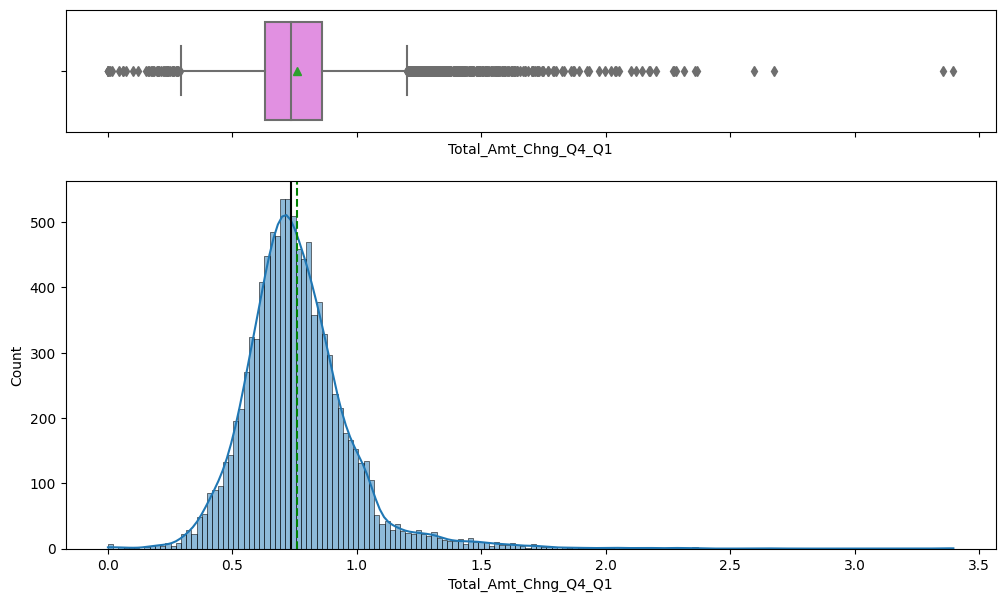

In [ ]:
histogram_boxplot(df, 'Total_Amt_Chng_Q4_Q1', kde =True)

* The data ranges from 0 to 3.397, with a considerable spread suggested by the standard deviation of 0.219.
* The distribution is slightly right-skewed as the mean is less than the median. This could be due to a few customers with notably higher changes in total amount.
* The quartiles (25th, 50th, and 75th percentiles) provide insights into the distribution, with most values falling within the range of 0.631 to 0.859.
* There are a lot of outliers in this variable

Total Trans Amt

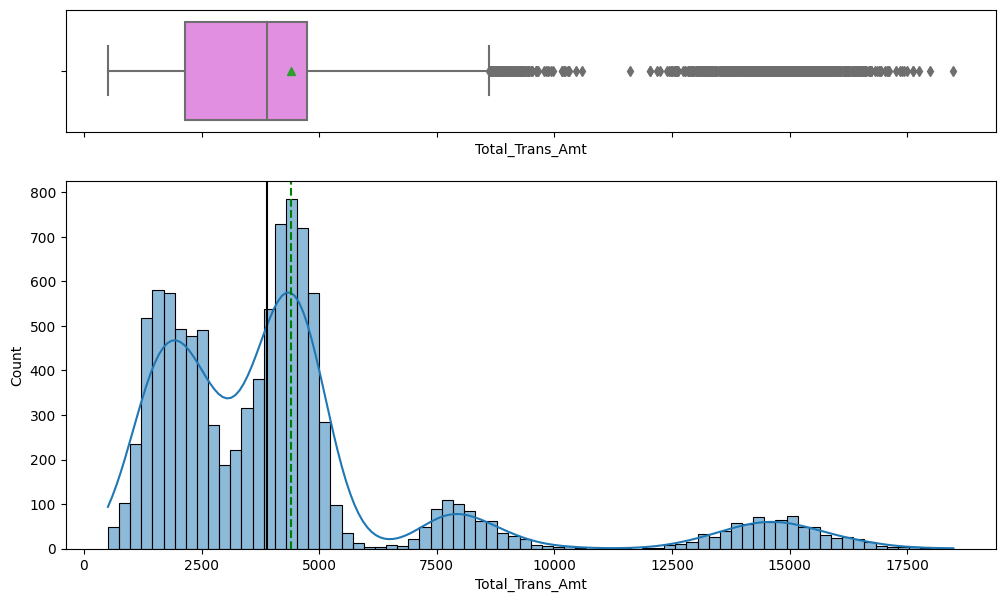

In [ ]:
histogram_boxplot(df, 'Total_Trans_Amt', kde =True)

* The data ranges from 510 to 18,484, with a substantial spread indicated by the standard deviation of 3397.129.
* The quartiles (25th, 50th, and 75th percentiles) provide insights into the distribution, with most values falling within the range of 2155.500 to 4741.000
* The "Total_Trans_Amt" distribution is right-skewed with a lot ofoutliers on high end
* There are a lot of outliers on the high end

Total Ct Chng Q4 Q1

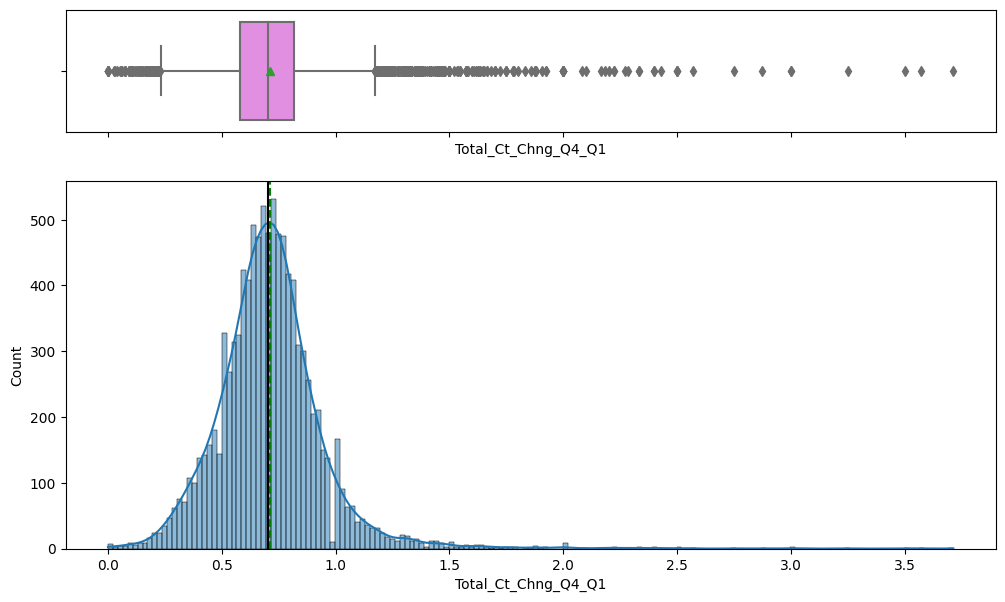

In [ ]:
histogram_boxplot(df, 'Total_Ct_Chng_Q4_Q1', kde =True)

* The average change in total transaction count from Q4 to Q1 is 0.712.
* There are numerious outliers

Avg Utilization Ratio

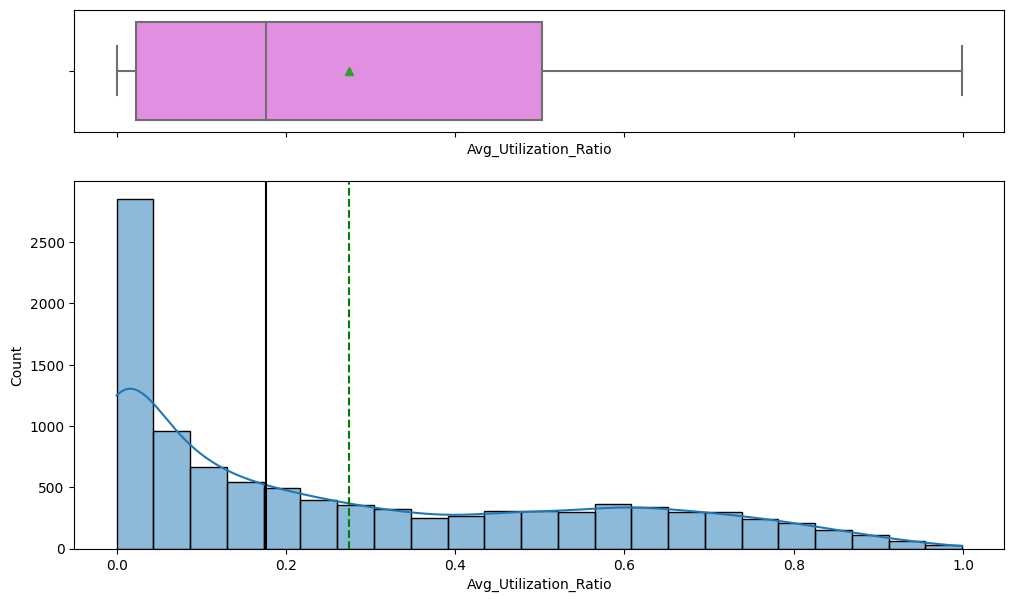

In [ ]:
histogram_boxplot(df, 'Avg_Utilization_Ratio', kde =True)

* Some customers have an utilization ratio of 0, meaning they are not utilizing their credit at all.
* The maximum utilization ratio of 0.999 suggests that some customers are almost fully utilizing their available credit.
* The distribution appears to be right-skewed, with the mean (0.275) lower than the median (0.176).

Dependent count

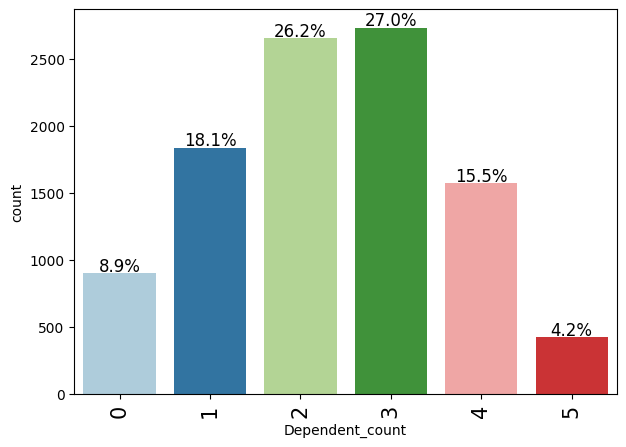

In [ ]:
labeled_barplot(df, "Dependent_count", perc=True)

* The most common dependent counts are 3 (27.0%) and 2 (26.2%). This suggests that a significant portion of customers have either 2 or 3 dependents
* Approximately 8.9% of customers have 0 dependents, suggesting a segment of single individuals without dependents.

Total Relationship count

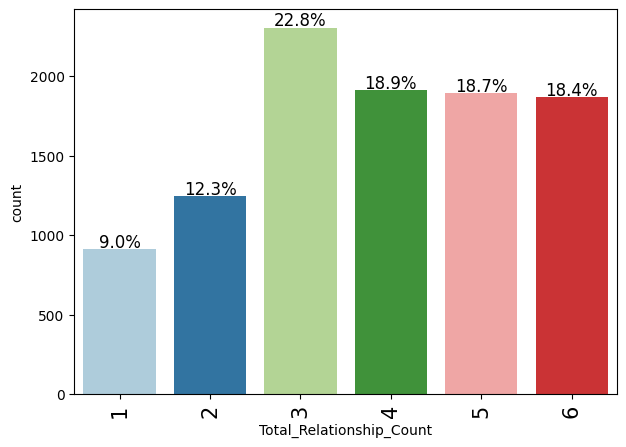

In [ ]:
labeled_barplot(df, "Total_Relationship_Count", perc=True)

* The most common total relationship counts are 3 (22.8%), 4 (18.9%), and 5 (18.7%) and 6 (18.4%). These counts represent a significant portion of customers.
* While less common, there are still customers with 1 or 2 total relationships (9.0% and 12.3%, respectively).

Months Inactive 12 mon

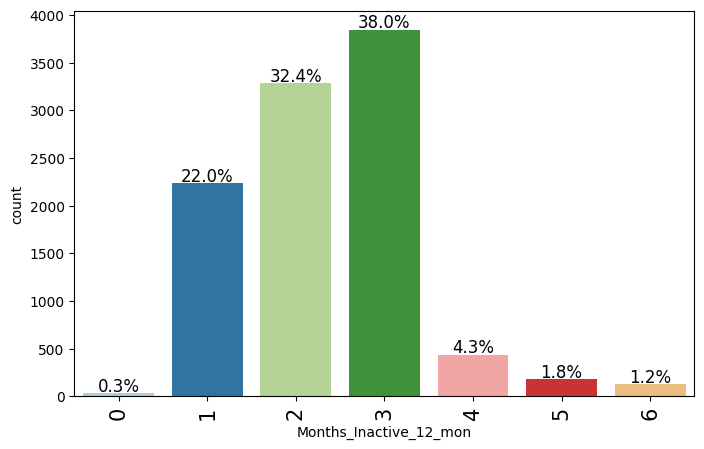

In [ ]:
labeled_barplot(df, "Months_Inactive_12_mon", perc=True)

* The most common inactivity periods are 3 months (38.0%) and 2 months (32.4%). These durations represent a significant portion of customers.
* The majority of customers (about 92.2%) have been inactive for 3 months or less. This suggests an overall active customer base with relatively short periods of inactivity.

Contacts Count 12 mon

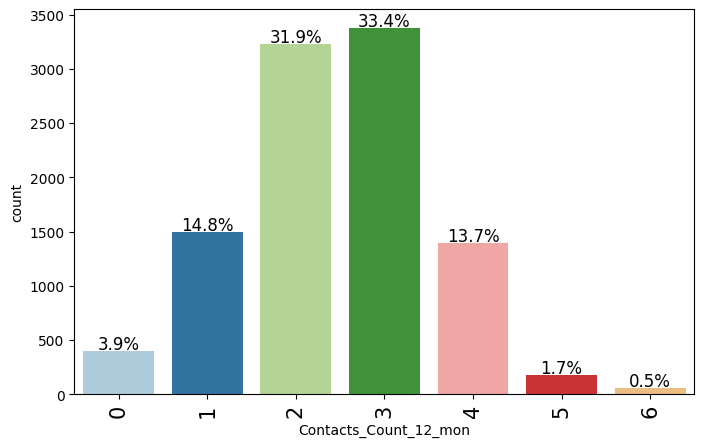

In [ ]:
labeled_barplot(df, "Contacts_Count_12_mon", perc=True)

*     The most common number of contacts made in the last 12 months is 3 (33.4%) and 2 (31.9%). These counts represent a significant portion of customer interactions.

* The distribution includes a range of contact counts from 0 to 6, indicating diverse levels of engagement with customers over the past year.
* A small percentage of customers (3.9%) had no contact in the last 12 months. Understanding the reasons behind this lack of contact can provide insights into customer preferences or behavior.

Gender

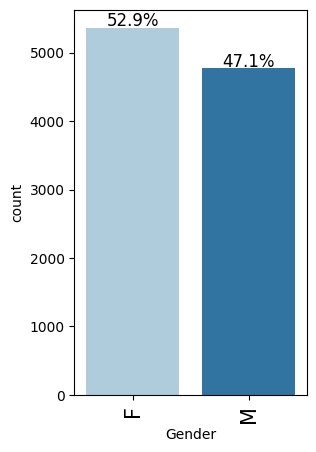

In [ ]:
labeled_barplot(df, "Gender", perc=True)

  * The dataset exhibits a relatively balanced distribution of gender among customers.

  * Females constitute the majority, accounting for approximately 52.9% of the customer base.

  * Males make up the remaining 47.1% of the dataset.

  * Given the near balance between female and male customers, the bank appears to attract and serve a diverse range of individuals, irrespective of gender.

Education Level

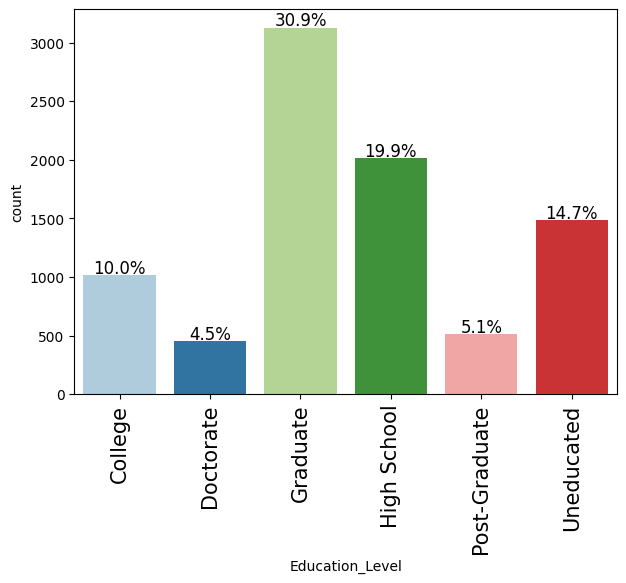

In [ ]:
labeled_barplot(df, "Education_Level", perc=True)

*  The most prevalent education level is "Graduate," constituting approximately 36.3% of the customer base. This suggests that a significant portion of customers have completed their undergraduate studies.
*  The "High School" and "Uneducated" categories make up 23.4% and 17.3%, respectively. This indicates a notable presence of customers with lower educational attainment levels.

Marital Status



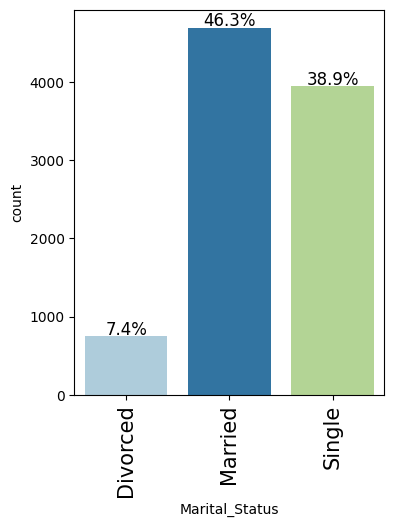

In [ ]:
labeled_barplot(df, "Marital_Status", perc=True)

*  A smaller proportion, about 8.0%, fall into the "Divorced" category.
* The dataset exhibits a relatively balanced distribution of marital status, with a significant portion of customers being married (50.0%)
* Approximately 42.0% of customers are categorized as "Single." This suggests a substantial presence of customers who are not married

Income Category

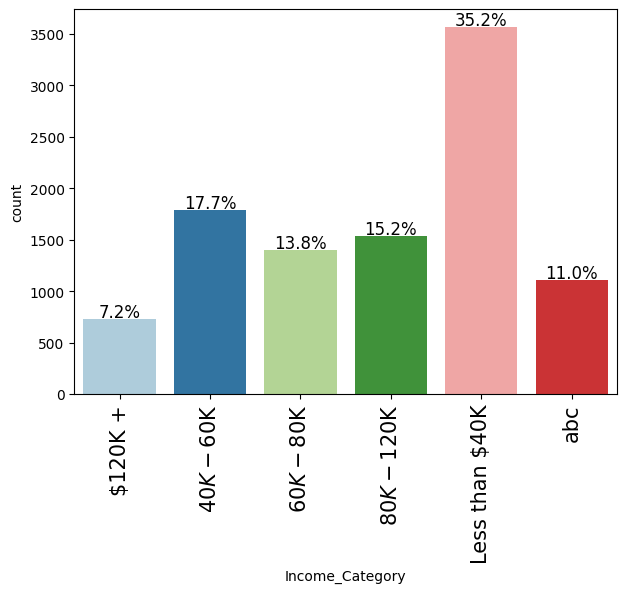

In [ ]:
labeled_barplot(df, "Income_Category", perc=True)

* The majority of customers fall into the "Less than $40K" income category, constituting 35.2% of the customer base. This indicates that a significant proportion of customers have relatively lower incomes.

* Customers in the "$40K - $60K," "$60K - $80K," and "$80K - $120K" income categories collectively make up 45.7% of the dataset. These categories represent a moderate portion of the customer base.

* There is a category labeled "abc" that represents 11.0% of the dataset. This might be a placeholder or an unconventional label.

* Higher-income categories, such as "$120K +," represent a smaller portion of the customer base at 7.2%. These customers may have different financial needs and preferences.

Card Category

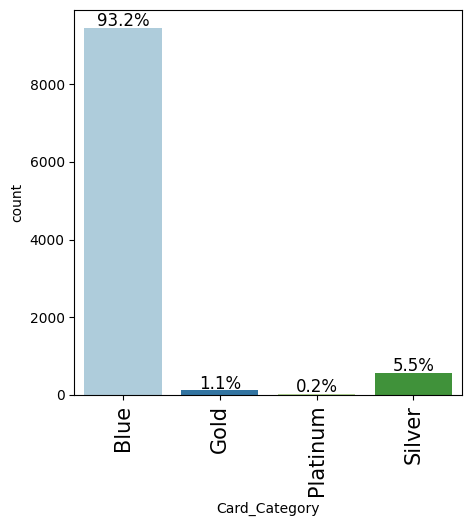

In [ ]:
labeled_barplot(df, "Card_Category", perc=True)

* The majority of customers (93.2%) hold Blue cards. This indicates that Blue cards are the most prevalent card category among the customers in the dataset.
* The distribution follows a hierarchy, where Blue cards are the most common, followed by Silver, Gold, and Platinum in decreasing order of prevalence.

Attrition Flag

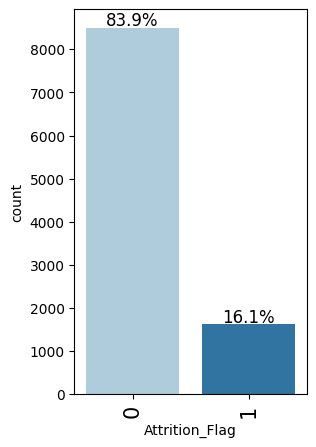

In [ ]:
labeled_barplot(df, "Attrition_Flag", perc = True)

* There is a notable class imbalance in the target variable. The majority class (0, representing "Existing Customer") has 8,500 instances, while the minority class (1,  representing "Attrited Customer") has 1,627 instances.

### Bivariate Distributions

Correalation check

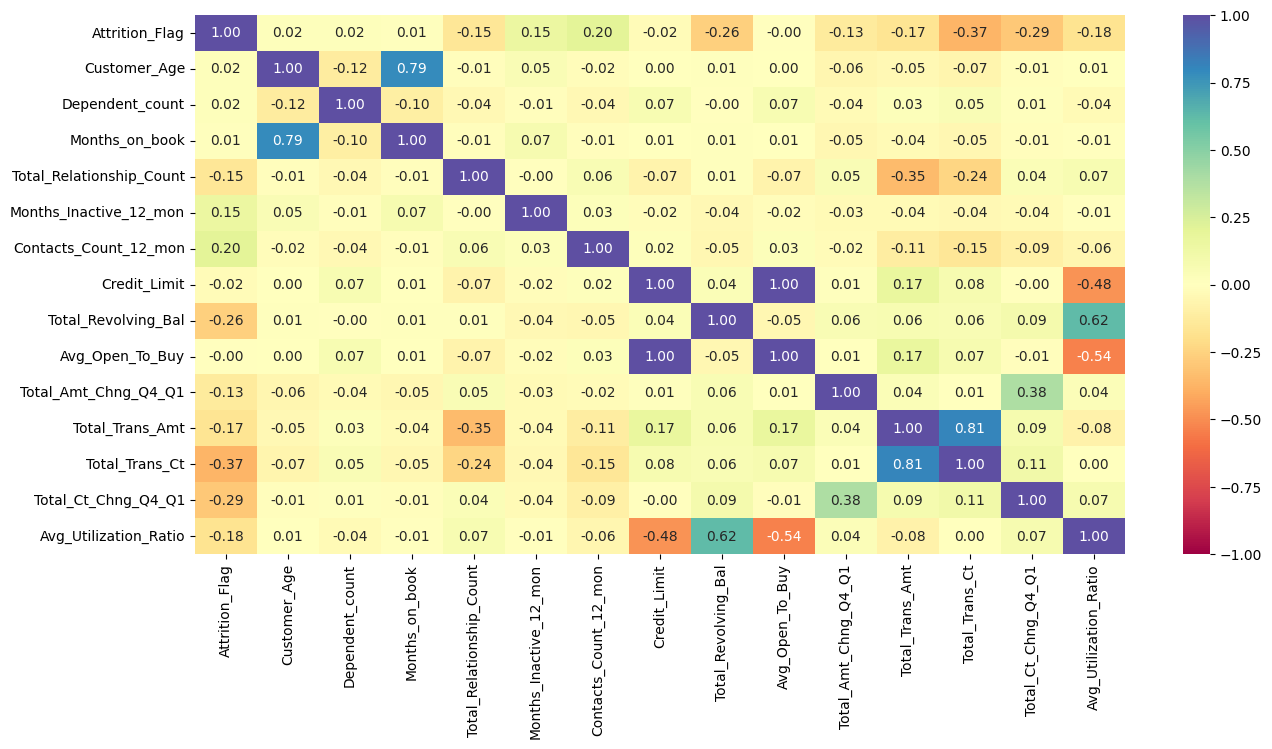

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* The correlation coefficient between "Customer_Age" and "Months_on_book" is approximately 0.789. This indicates a strong positive correlation between these two variables.
* The correlation between "Credit_Limit" and "Avg_Open_To_Buy" is 0.996. The values are close to 1, suggesting a strong positive linear relationship between these two variables.
*     The correlation between "Total_Trans_Ct" and "Total_Trans_Amt" is 0.807.
This correlation coefficient of 0.807 suggests a strong positive linear relationship between the total transaction count and the total transaction amount.
* A negative correlation of -0.539 indicates a moderate strength of the relationshipn between "Avg_Open_To_Buy" and "Avg_Utilization_Ratio."
* The correlation between "Total_Revolving_Bal" and "Avg_Utilization_Ratio" is 0.624. It indicates a moderate strength of the relationship

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


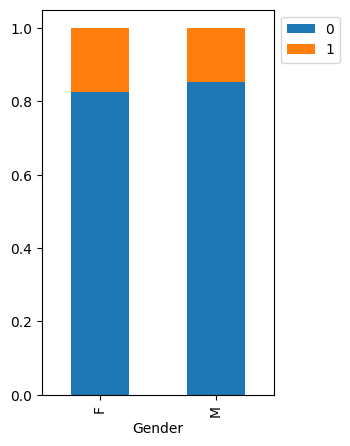

In [ ]:
stacked_barplot(df, "Gender", "Attrition_Flag")

* The majority of instances in the dataset have an "Attrition_Flag" of 0, indicating no attrition. This suggests that, overall, a significant portion of customers is not experiencing attrition
* Analyzing by gender, both males and females experience attrition, but the exact distribution differs.

`Attrition_Flag vs Marital_Status`

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


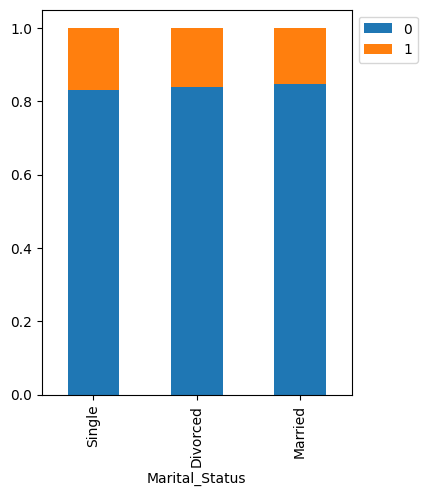

In [ ]:
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

* The majority of instances in the dataset have an "Attrition_Flag" of 0, indicating no attrition. This suggests that, overall, a significant portion of customers is not experiencing attrition

Attrition_Flag vs Education_Level

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


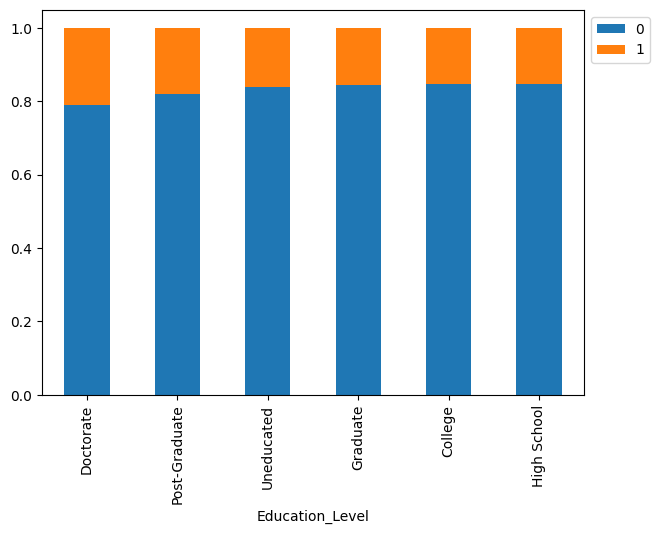

In [ ]:
stacked_barplot(df, 'Education_Level', "Attrition_Flag")

* The majority of instances in the dataset have an "Attrition_Flag" of 0, indicating no attrition.
* Doctorate has a relatively higher attrition rate compared to other education levels in the provided dataset.

Attrition_Flag vs Income_Category

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


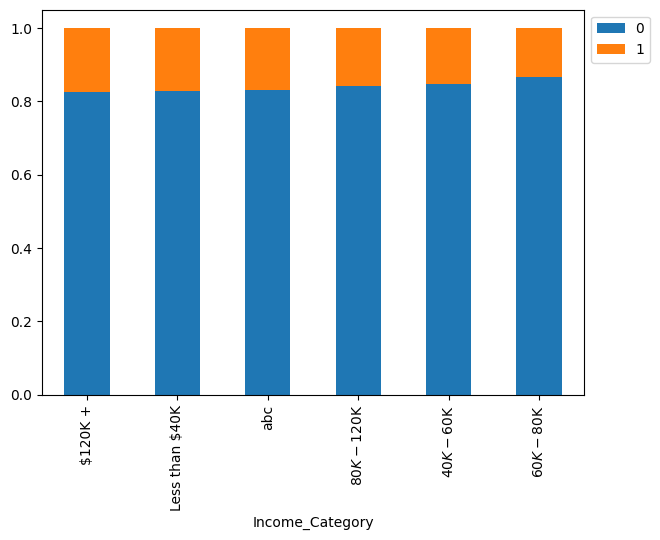

In [ ]:
stacked_barplot(df, 'Income_Category', "Attrition_Flag")

*  individuals with an income less than $40K  and 120K + have a slightly higher count of attrited customers compared to other income categories.
* "abc" is not a meaningful category for income and represents an error or missing data

Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


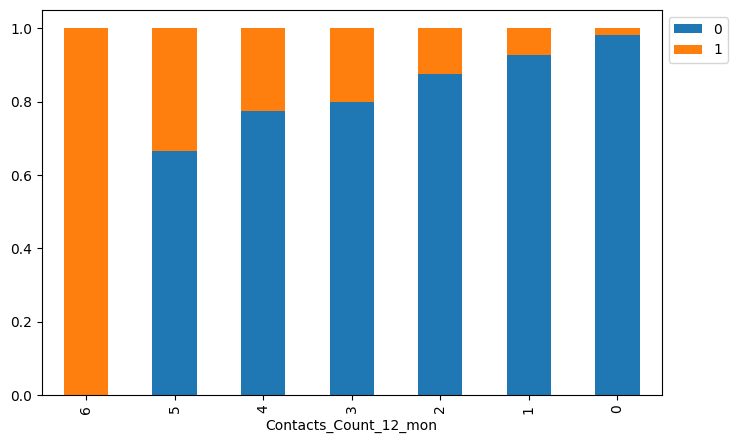

In [ ]:
stacked_barplot(df, 'Contacts_Count_12_mon', "Attrition_Flag")

* Individuals with 1, 2, 3, and 4 contacts in the last 12 months have varying attrition patterns. For instance, individuals with 6 contacts all experienced attrition.
* ndividuals with 0 contacts in the last 12 months have a relatively lower attrition count, suggesting that fewer contacts may be associated with lower attrition.

Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


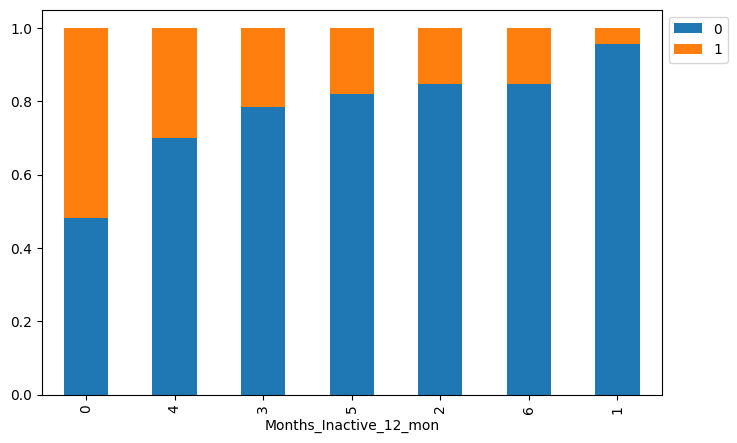

In [ ]:
stacked_barplot(df, 'Months_Inactive_12_mon', "Attrition_Flag")

 * Individuals with 3 months and 4 month  of inactivity show a higher attrition count
 * The highest attrition count is observed among customers who have had zero months of inactivity in the last 12 month

Attrition_Flag vs Total_Relationship_Count

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


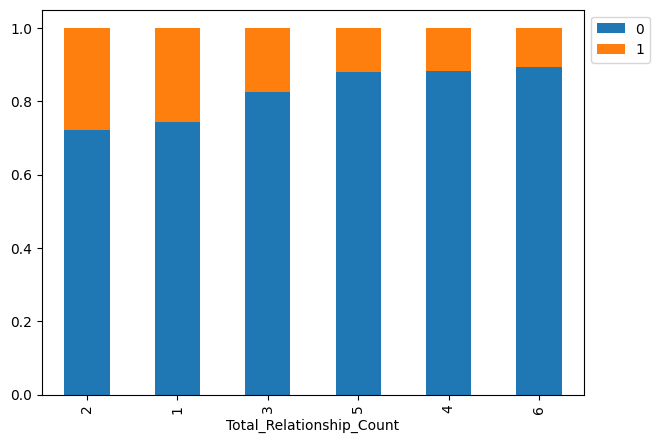

In [ ]:
stacked_barplot(df, 'Total_Relationship_Count', "Attrition_Flag")

*  Individuals with 3 total relationships have the highest attrition count, followed by those with 2 and 1 total relationships.

Attrition_Flag vs Dependent_count

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


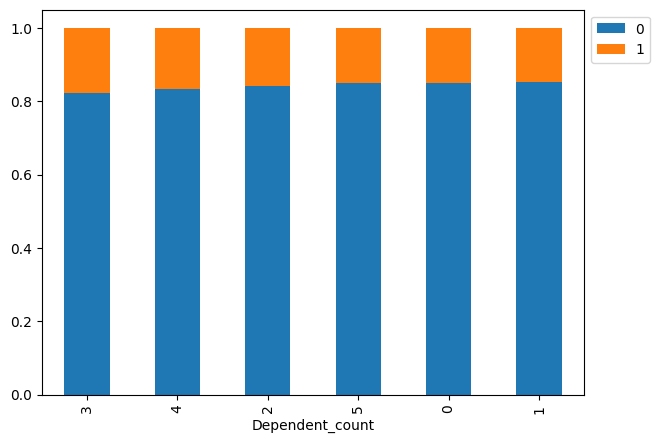

In [ ]:
stacked_barplot(df, 'Dependent_count', "Attrition_Flag")

* Individuals with 3 dependents have the highest attrition count, followed by those with 2 and 4 dependents.



Total_Revolving_Bal vs Attrition_Flag


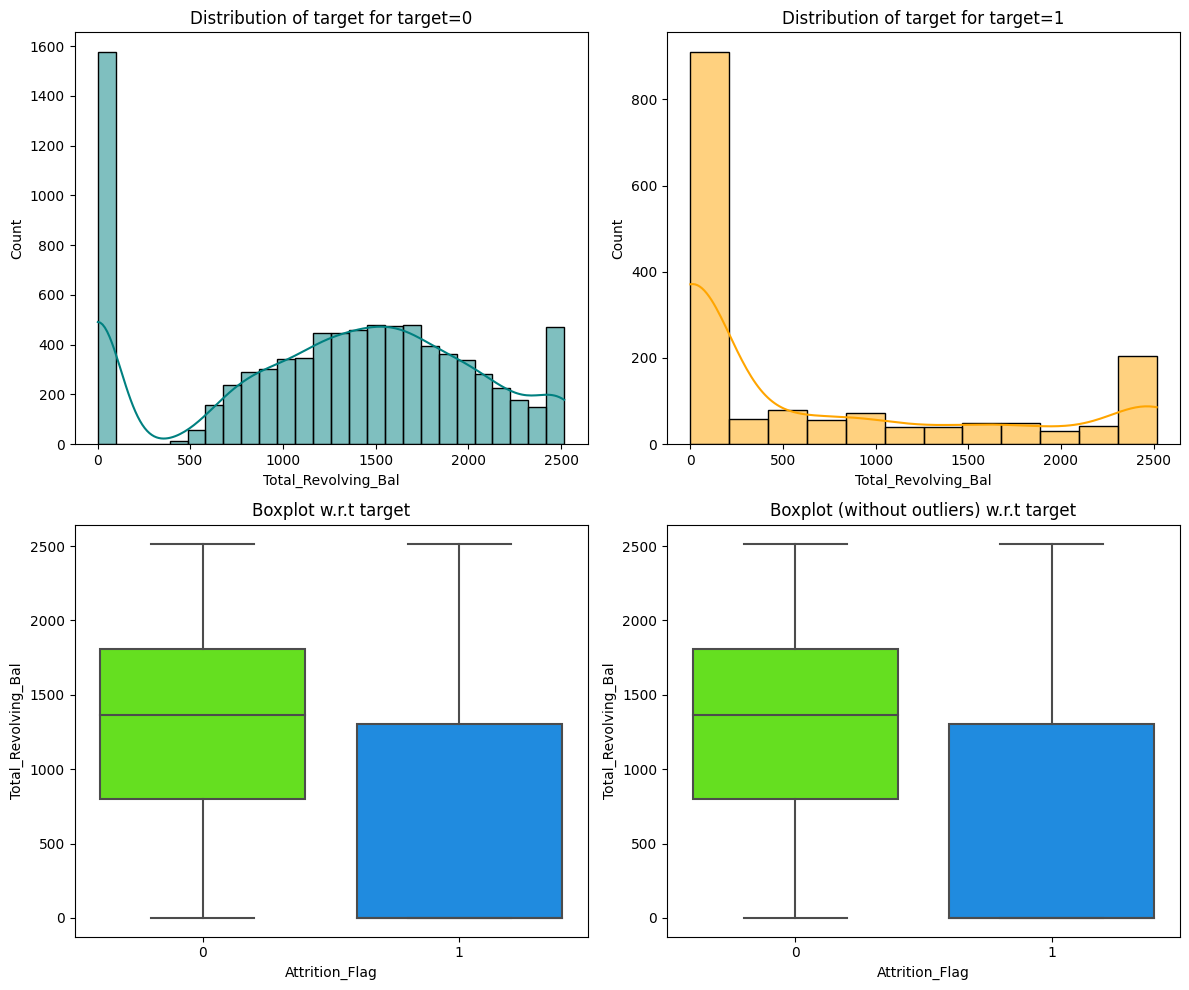

In [ ]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

* Notably, a substantial number of attrited customers have zero revolving balances, as indicated by the 25th and 50th percentiles.

* 75% of attrited customers have a revolving balance of $1,303.50 or less.

* The average revolving balance for existing customers is 1,256.60,
which is higher than the mean for attrited customers ($672.82). This indicates that, on average, existing customers have higher revolving balance

Attrition_Flag vs Credit_Limit

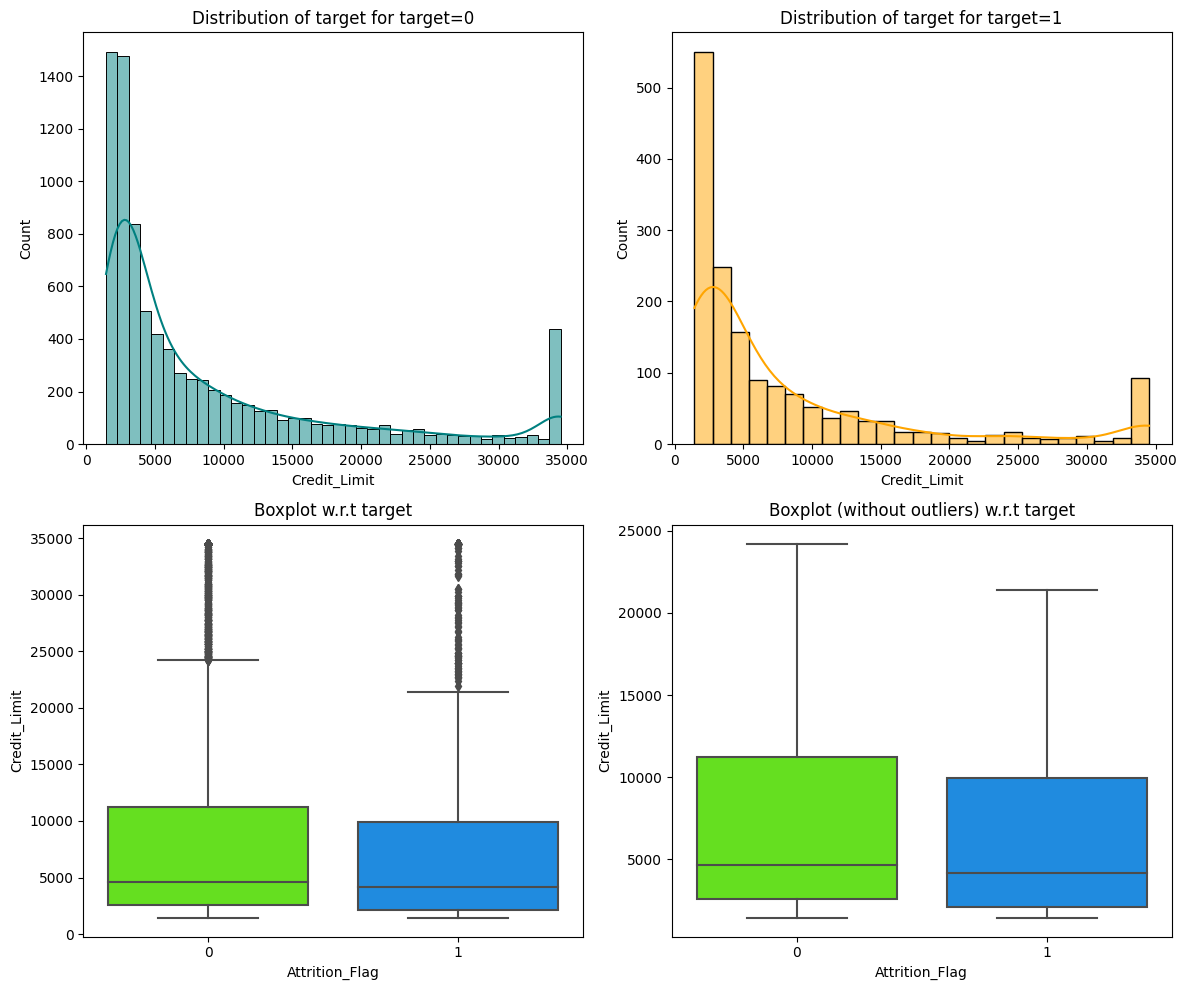

In [ ]:
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

* . The mean "Credit_Limit" for existing customers (8,726.88) is slightly higher than that for attrited customers (8,136.04).
* The median "Credit_Limit" for existing customers is 4,643.50. This indicates that 50% of existing customers have limits below this value, and it is slightly higher than the mentioned median for attrited customers
* The 75th percentile (Q3) for attrited customers is 9,933.50, while for existing customers, it is slightly higher at $11,252.75. This indicates that 75% of customers in both groups have "Credit_Limits" below these respective values, and existing customers have a slightly higher upper range

Attrition_Flag vs Customer_Age

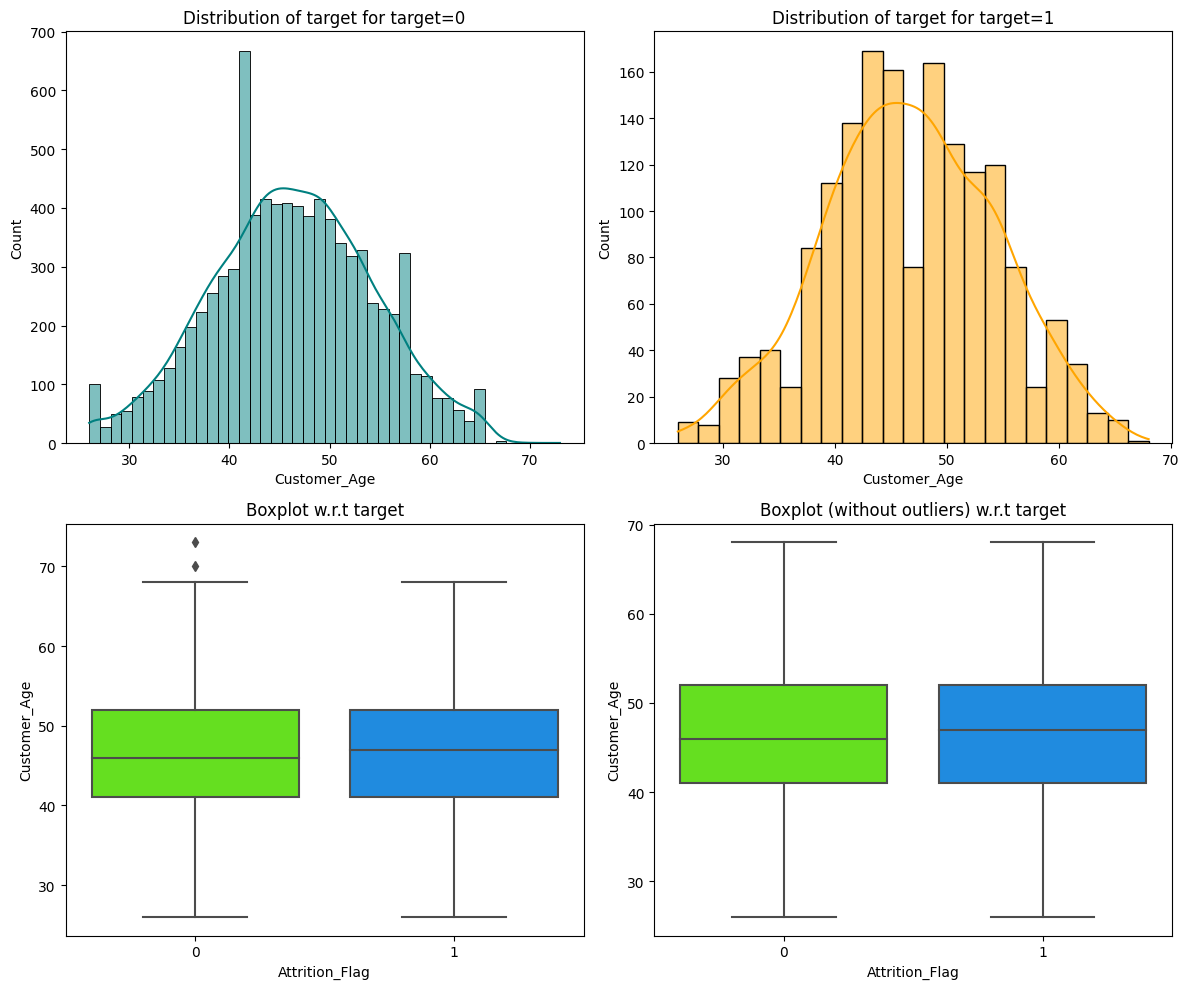

In [ ]:
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

* The mean ages of existing and attrited customers are close, with attrited customers being slightly older on average



Total_Trans_Ct vs Attrition_Flag


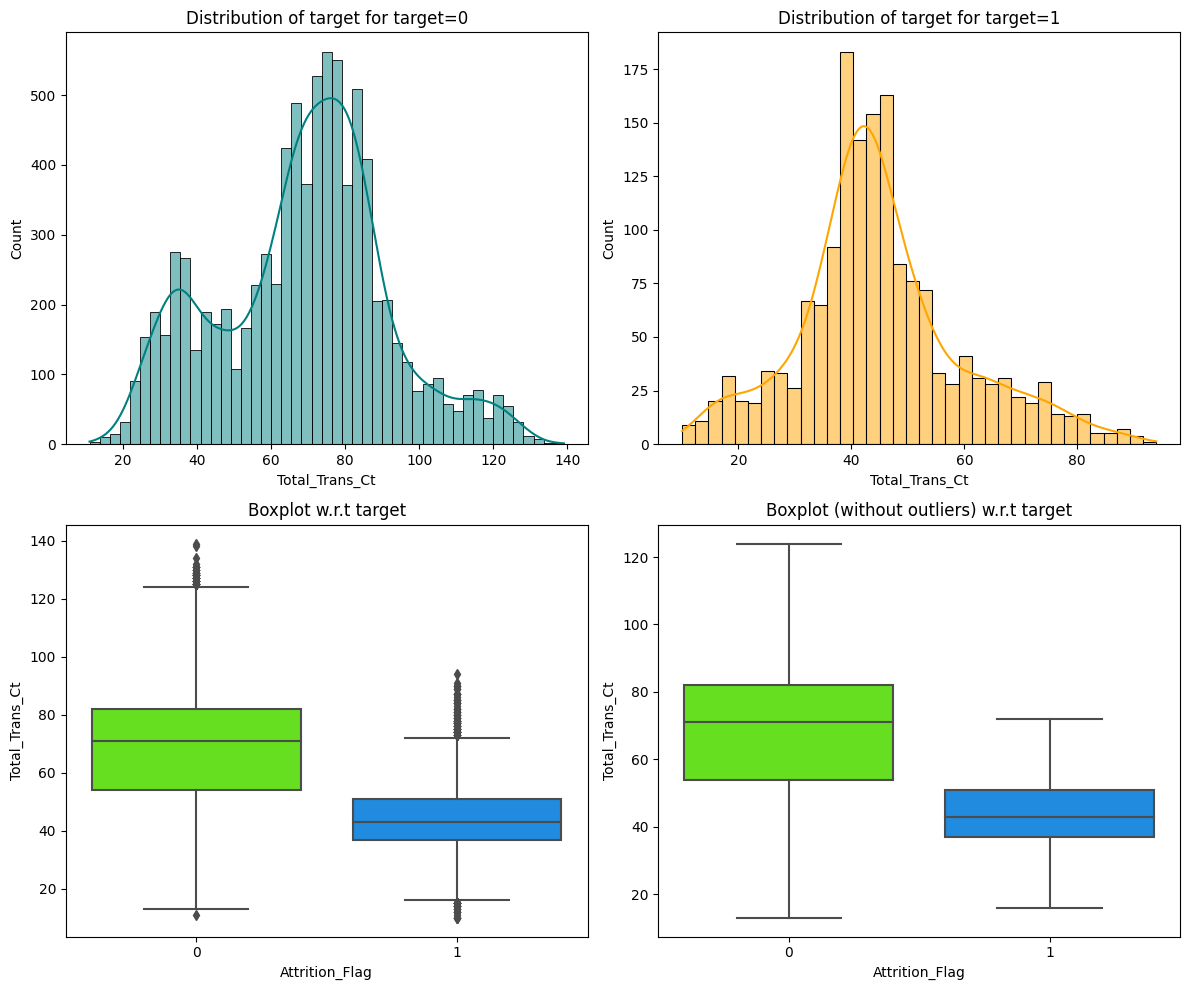

In [ ]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

* Existing customers have, on average, higher values for this variable compared to attrited customers.
*     For the given variable, attrited customers generally have lower values across the percentiles (25th, 50th, and 75th) compared to existing customers.
* The median (50th percentile) for attrited customers is 43, whereas for existing customers, it is higher at 71. This indicates that half of the attrited customers have values below 43, while half of the existing customers have values below 71.
* Similarly, the 75th percentile value for attrited customers (51) is notably lower than the 75th percentile value for existing customers (82).
* Attrited customers tend to have lower values on average, with less variability in comparison to existing customers.



Total_Trans_Amt vs Attrition_Flag


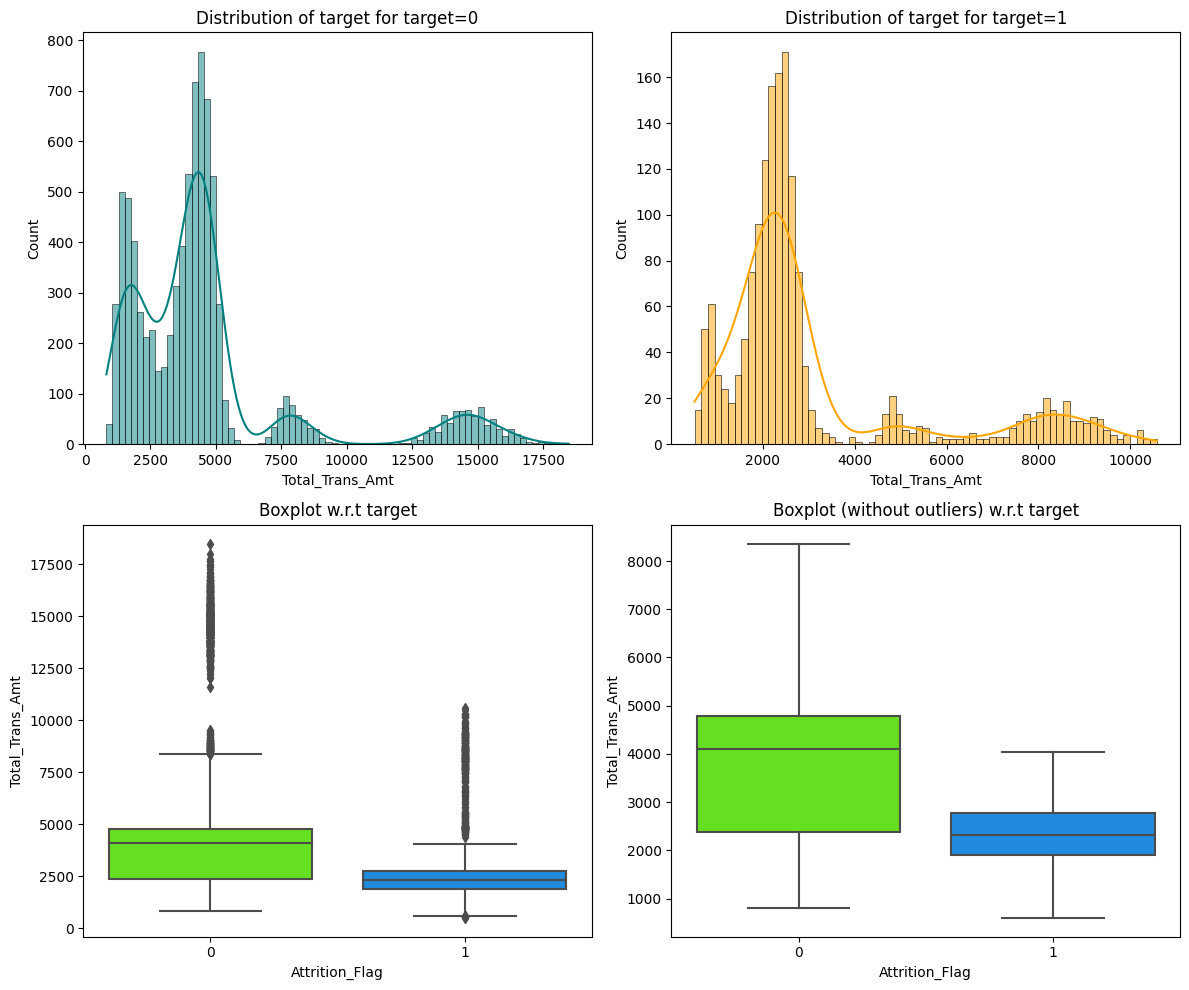

In [ ]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

* Existing customers, on average, have higher total transaction amounts (4,654.66) compared to attrited customers ($3,095.03)

*     Across all percentiles (25th, 50th, and 75th), existing customers have higher transaction amounts compared to attrited customers.
The median transaction amount (50th percentile) for existing customers is notably higher than that for attrited customers.



Total_Ct_Chng_Q4_Q1 vs Attrition_Flag


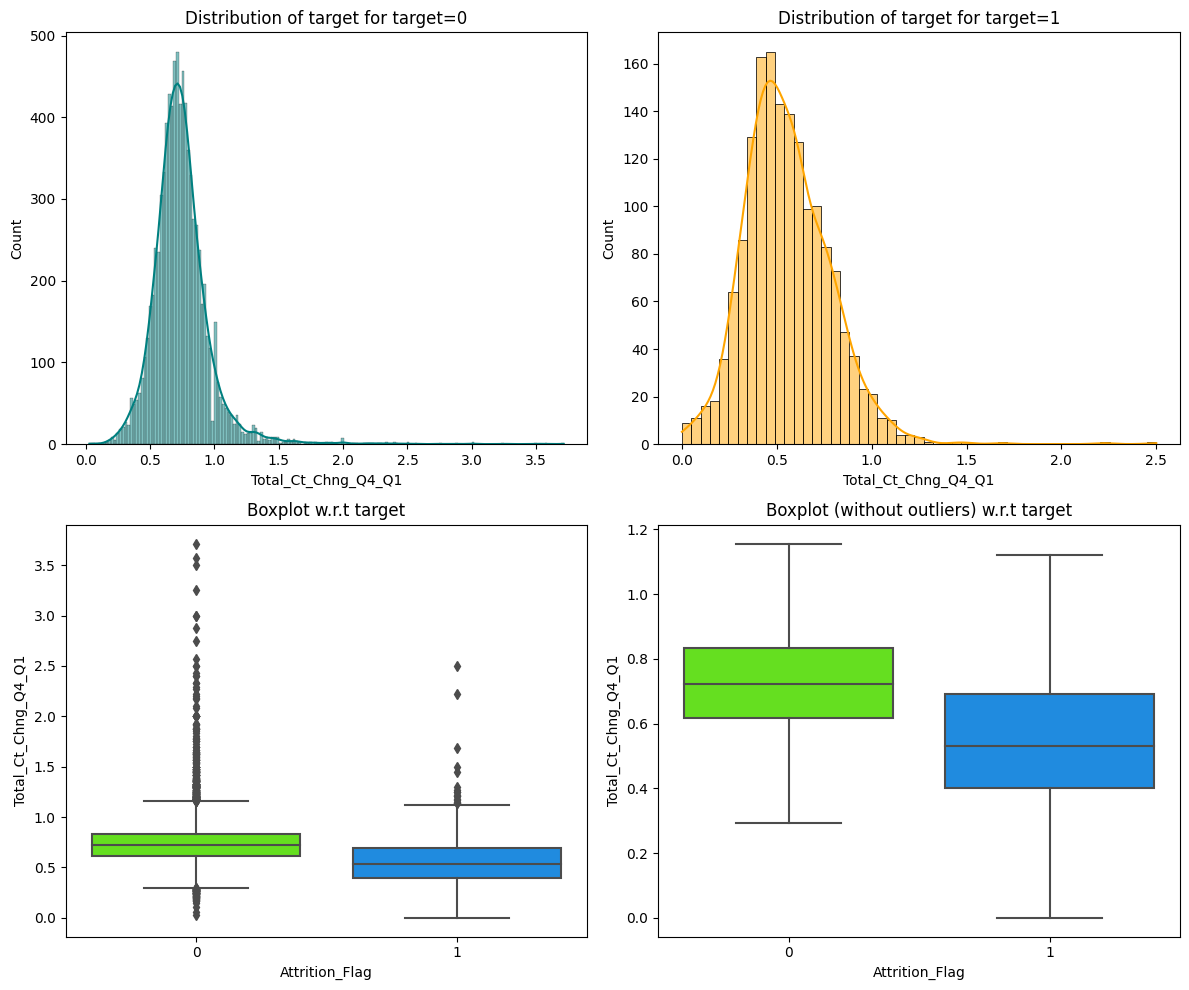

In [ ]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* The median value for the variable is higher for existing customers (0.721) compared to attrited customers (0.531).
* 75% of attrited customers have a count change lower than 0.692, while 75% of existing customers have a count change lower than 0.833.



Avg_Utilization_Ratio vs Attrition_Flag


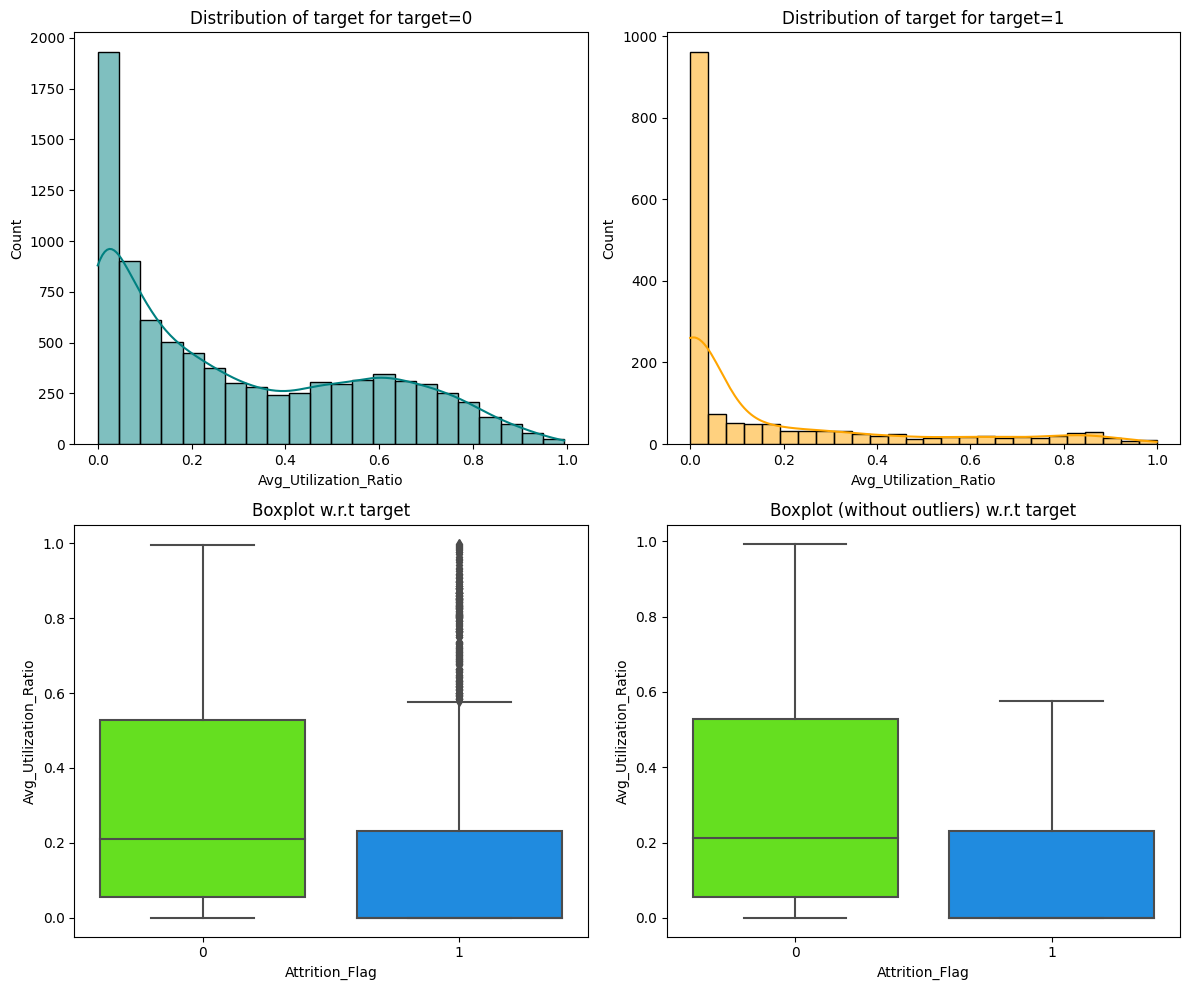

In [ ]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

* On average, existing customers have a higher "Avg_Utilization_Ratio" (mean: 0.296) compared to attrited customers (mean: 0.162).
* The median "Avg_Utilization_Ratio" for attrited customers is 0, indicating that 50% of attrited customers have a utilization ratio of 0
* Existing customers show more variability in their utilization ratio, as indicated by the wider range between Q1 (0.055) and Q3 (0.529).
* The 75th Percentile (Q3) for attrited customers is 0.231, which is significantly lower than the 75th Percentile for existing customers

Attrition_Flag vs Months_on_book

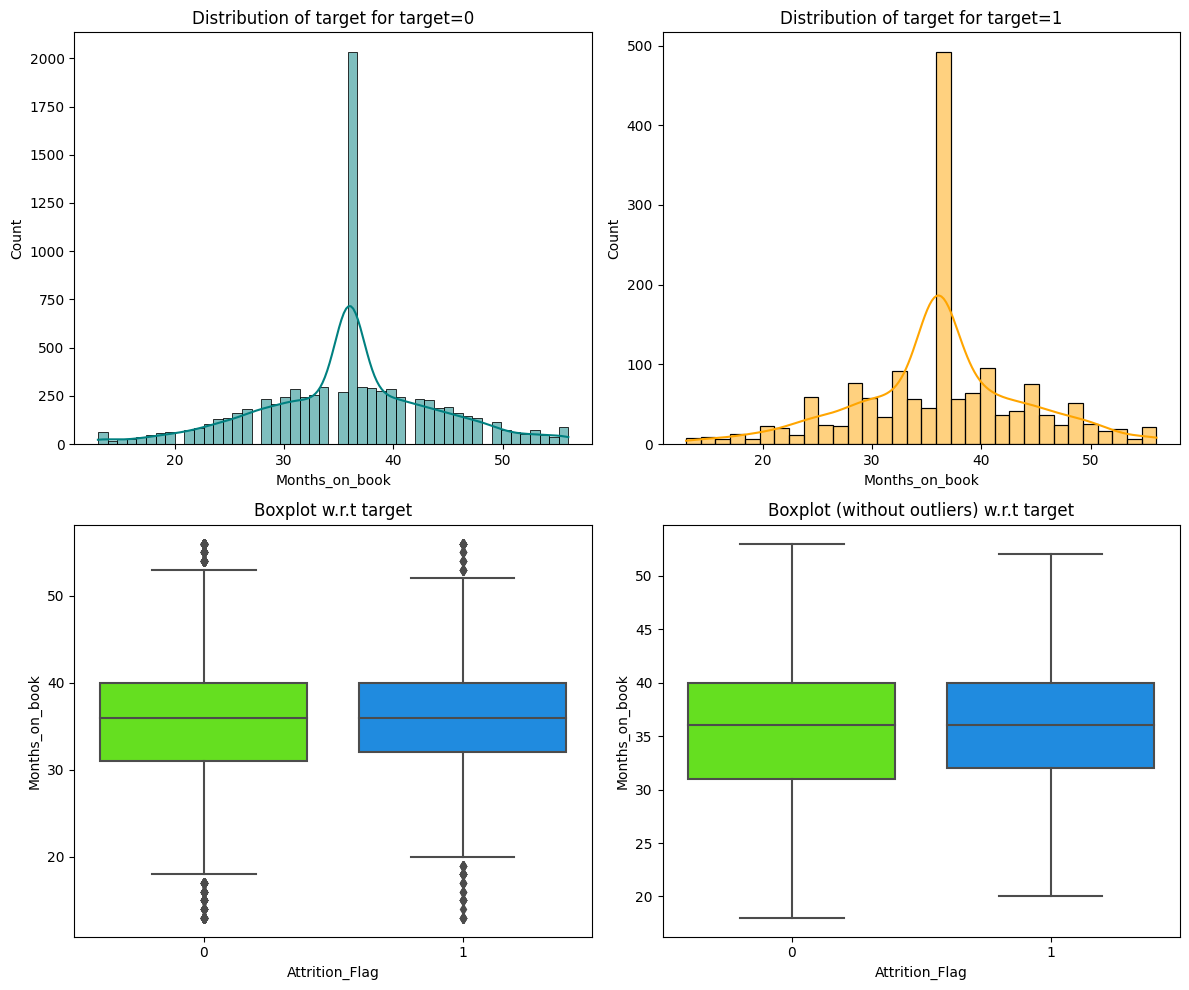

In [ ]:
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag")

* Both existing customers (Attrition_Flag = 0) and attrited customers (Attrition_Flag = 1) have a similar mean duration of months on book, with existing customers having a mean of approximately 35.881 and attrited customers having a mean of approximately 36.178.
* The interquartile range (IQR) is similar for both groups, with values around 31 to 40 months.

Attrition_Flag vs Total_Revolving_Bal

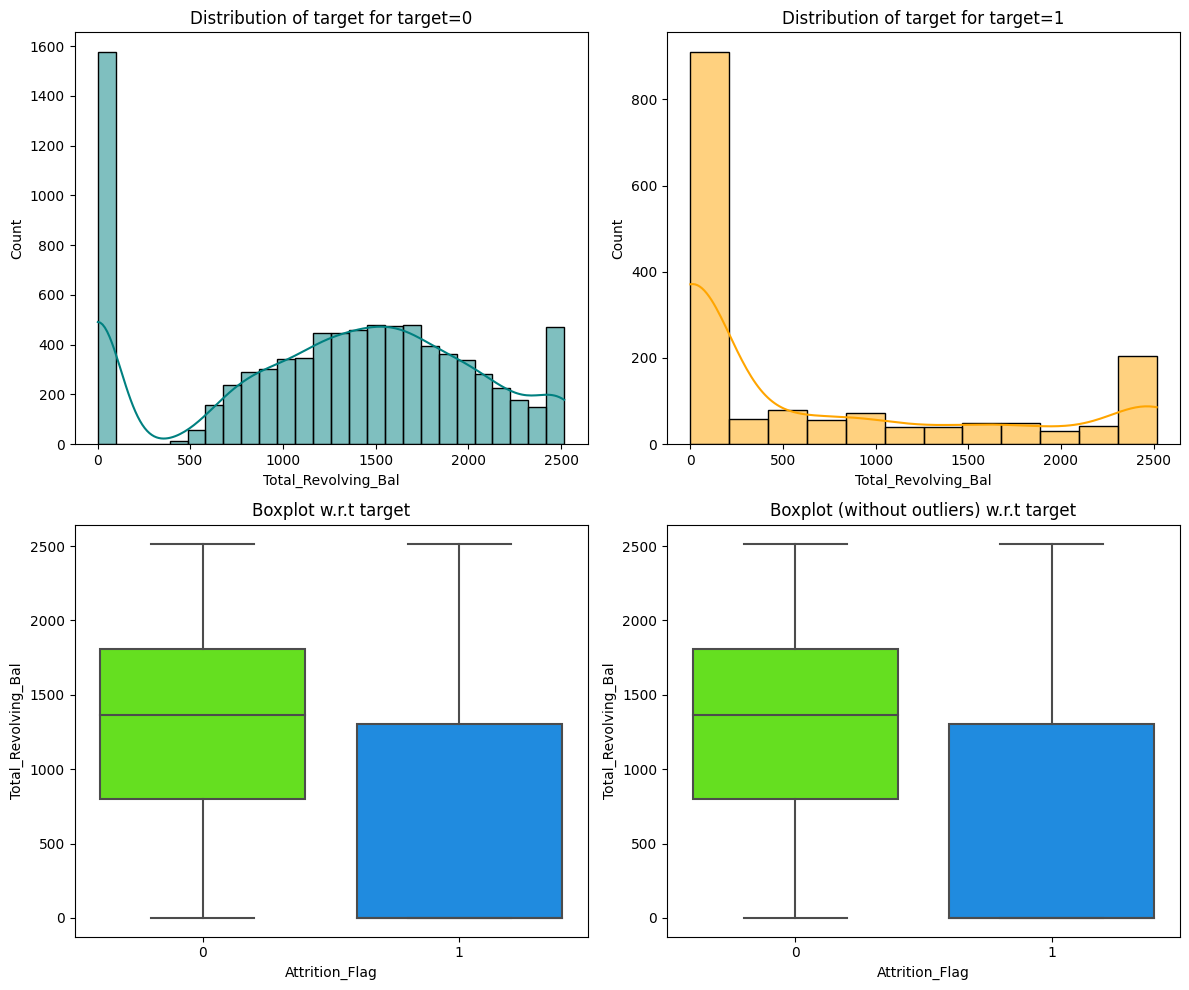

In [ ]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

* Existing customers  have a higher average "Total_Revolving_Bal"  compared to attrited customers
* The median (for attrited customers is 0, indicating that 50% of attrited customers have a revolving balance of 0.000.
* The 75th percentile for existing customers is 1807.000, while for attrited customers, it is 1303.500.

Attrition_Flag vs Avg_Open_To_Buy

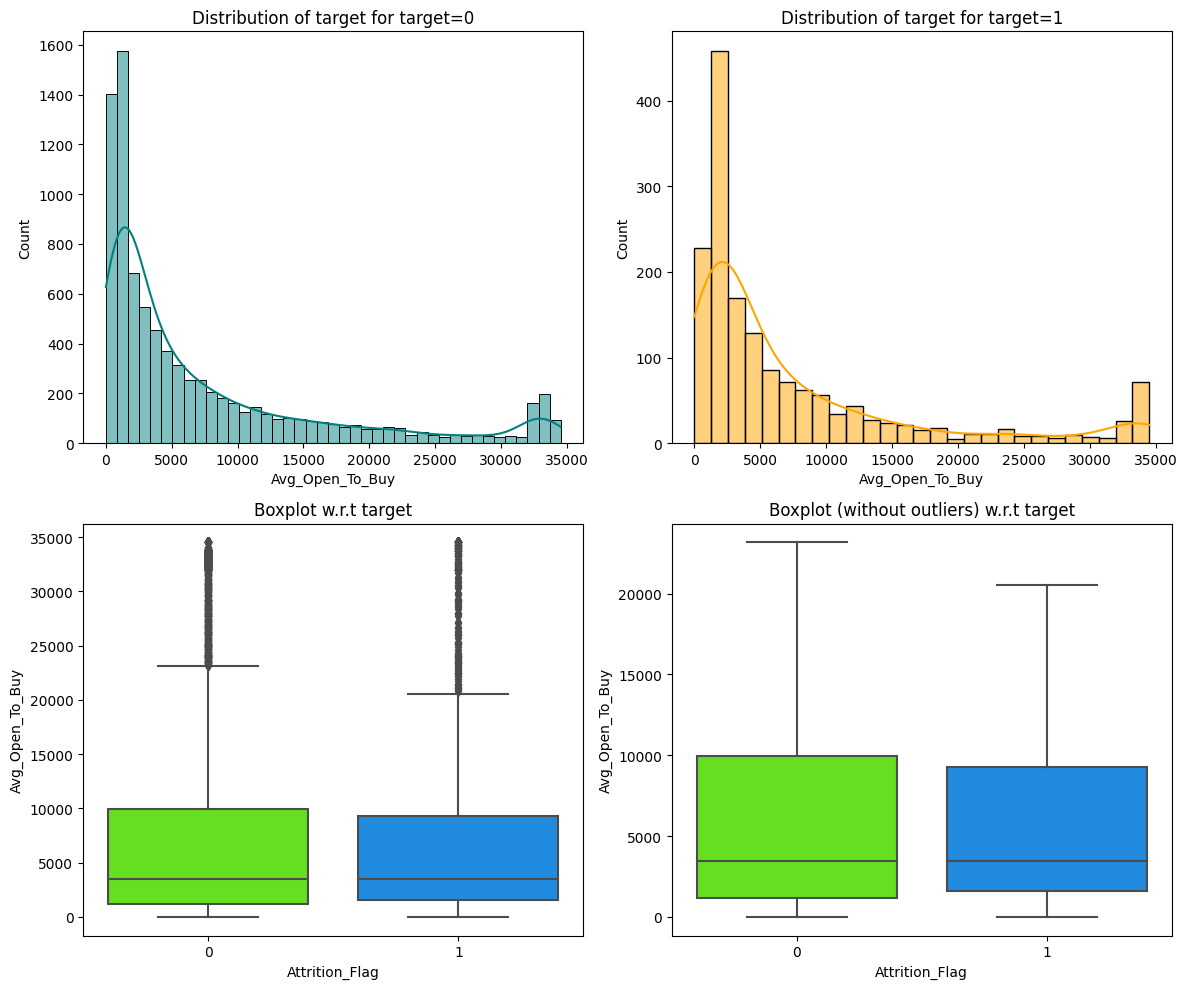

In [ ]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

* There is little difference in the mean "Avg_Open_To_Buy" between existing and attrited customers. Both groups have a wide range of values, and the spread of "Avg_Open_To_Buy" is quite similar.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

## Data Pre-processing

### Outlier Detection

In [ ]:
Q1 = data.quantile(0.25)  # To find the 25th percentile
Q3 = data.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [ ]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

CLIENTNUM                  0.000
Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64

Outliers may actually represent valid and meaningful data points in the context Removing them could lead to a loss of important information.

Train-Test Split

In [ ]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
#replacing abc value

df['Income_Category'].replace("abc", np.nan, inplace=True)

In [ ]:
df['Income_Category'].value_counts(dropna=False)

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
NaN               1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
df.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* Education_Level, Marital_Status, and Income_Category have missing values.
* We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

### Data Preparation for Modeling

In [ ]:
X = df.drop(['Attrition_Flag', 'Credit_Limit', 'Total_Trans_Ct', 'Months_on_book'], axis = 1)
y=df["Attrition_Flag"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, Y_temp, Y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# then we split temporary set into train and validation

X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.25, random_state=1, stratify = Y_temp)

print(X_train.shape, X_val.shape, X_test.shape )

(6075, 16) (2026, 16) (2026, 16)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


## Missing value imputation




In [ ]:
#Create list of categorical columns with missing values and replace then on train, val, test separately to avoid data leakage
cols= ['Education_Level', 'Marital_Status', 'Income_Category']

#Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cols]=cat_imputer.fit_transform(X_train[cols])
X_val[cols]=cat_imputer.transform(X_val[cols])
X_test[cols]=cat_imputer.transform(X_test[cols])

In [ ]:
# Let's encode ordinaly variables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['Card_Category'] = le.fit_transform(X_train['Card_Category'])


In [ ]:
education_level = {
    'Uneducated': 0,
    "High School": 1,
    "Graduate": 2,
    "College": 3,
    "Post-Graduate": 4,
    "Doctorate": 5
}

In [ ]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', nan, 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [ ]:
X_train['Education_Level'] = X_train['Education_Level'].map(education_level)

In [ ]:
X_train['Education_Level'].head()

800     2
498     2
4356    1
407     2
8728    1
Name: Education_Level, dtype: int64

In [ ]:

X_val['Card_Category'] = le.transform(X_val['Card_Category'])
X_test['Card_Category'] = le.transform(X_test['Card_Category'])

In [ ]:
X_val['Education_Level'] = X_val['Education_Level'].map(education_level)

In [ ]:
X_test['Education_Level'] = X_test['Education_Level'].map(education_level)

In [ ]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print('-'*50)
print(X_val.isna().sum())
print('-'*50)
print(X_test.isna().sum())
print('-'* 50)

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
--------------------------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
Avg_Ut

* All missing values have been treated.

### Creating Dummy Variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test=pd.get_dummies(X_test, drop_first=True)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 20) (2026, 20) (2026, 20)


In [ ]:
X_train.head()

,Customer_Age,Dependent_count,Education_Level,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K
800,40,2,2,0,6,4,3,1602,18454.000,0.466,1687,0.533,0.080,1,0,1,0,0,0,0
498,44,1,2,0,6,2,0,1895,990.000,0.387,1366,0.632,0.657,1,1,0,0,0,0,1
4356,48,4,1,0,5,1,2,2517,4281.000,0.873,4327,0.881,0.370,1,1,0,0,0,1,0
407,41,2,2,3,6,2,0,0,27000.000,0.610,1209,0.300,0.000,1,1,0,0,1,0,0
8728,46,4,1,3,2,2,3,1356,13678.000,0.754,7737,0.750,0.090,1,0,0,1,0,0,0


* After encoding there are 29 columns

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
X_train

,Customer_Age,Dependent_count,Education_Level,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K
800,40,2,2,0,6,4,3,1602,18454.000,0.466,1687,0.533,0.080,1,0,1,0,0,0,0
498,44,1,2,0,6,2,0,1895,990.000,0.387,1366,0.632,0.657,1,1,0,0,0,0,1
4356,48,4,1,0,5,1,2,2517,4281.000,0.873,4327,0.881,0.370,1,1,0,0,0,1,0
407,41,2,2,3,6,2,0,0,27000.000,0.610,1209,0.300,0.000,1,1,0,0,1,0,0
8728,46,4,1,3,2,2,3,1356,13678.000,0.754,7737,0.750,0.090,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,47,2,2,0,6,2,2,0,5145.000,0.693,1588,0.944,0.000,0,0,1,0,0,0,1
5633,47,3,0,0,3,3,4,0,34516.000,0.517,2020,0.375,0.000,1,0,1,0,0,0,0
9621,50,0,4,0,3,4,1,2221,1247.000,0.783,14222,0.627,0.640,0,0,0,0,0,0,1
593,45,4,0,0,3,4,3,0,4908.000,0.993,827,0.750,0.000,0,1,0,0,0,0,1


### Model Building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metrics='logloss')))


for name, model in models:
    model.fit(X_train, Y_train)
    scores = recall_score(Y_train, model.predict(X_train))
    print(name)
    print("training recall: ", scores)
   # print("\n" "Training Performance:" )
    # print("{}: {}".format(name, scores))
    #print("Validation Performance:" )
    scores_val = recall_score(Y_val, model.predict(X_val))
    print("validation recall: ", scores_val)
    #print("{}: {}".format(name, scores_val))
    difference1 = scores - scores_val
    print("Difference: {:.4f}".format(difference1))
    print('\n')

Bagging
training recall:  0.9713114754098361
validation recall:  0.7883435582822086
Difference: 0.1830


Random forest
training recall:  1.0
validation recall:  0.7730061349693251
Difference: 0.2270


GBM
training recall:  0.8227459016393442
validation recall:  0.8190184049079755
Difference: 0.0037


Adaboost
training recall:  0.764344262295082
validation recall:  0.7638036809815951
Difference: 0.0005


dtree
training recall:  1.0
validation recall:  0.7699386503067485
Difference: 0.2301


XGBoost
training recall:  1.0
validation recall:  0.8588957055214724
Difference: 0.1411




* Random Forest, Decision Tree and XGBoost models show perfect accuracy on the training set, which may suggest overfitting.
* Gradient Boosting Machine (GBM) seems to generalize well, showing a reasonable drop in accuracy from training to validation.
* Adaboost shows a good balance between training and validation accuracy.
* Bagging, Random Forest, Decision Tree models exhibit significant differences between training and validation scores, suggesting potential overfitting.

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, Y_train)

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(Y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(Y_train == 0)))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 



In [ ]:
print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 



In [ ]:
print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

After Oversampling, the shape of train_X: (10198, 20)
After Oversampling, the shape of train_y: (10198,) 



In [ ]:
print("\nTraining and Validation Performance Difference using Oversampled data:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(Y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference using Oversampled data:

Bagging: Training Score: 0.9973, Validation Score: 0.8466, Difference: 0.1506
Random forest: Training Score: 1.0000, Validation Score: 0.8160, Difference: 0.1840
GBM: Training Score: 0.9694, Validation Score: 0.8896, Difference: 0.0798
Adaboost: Training Score: 0.9408, Validation Score: 0.8528, Difference: 0.0880
dtree: Training Score: 1.0000, Validation Score: 0.8006, Difference: 0.1994
XGBoost: Training Score: 1.0000, Validation Score: 0.8926, Difference: 0.1074


* Bagging, Random Forest, and Decision Tree models may be overfitting, as indicated by the larger differences between training and validation scores. GBoost, although showing a moderate difference, shows perfect accurancy on trainig set, t, which may suggest overfitting.
Adaboost shows moderate result

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, Y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(Y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(Y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 20)
After Under Sampling, the shape of train_y: (1952,) 



In [ ]:
print("\nTraining and Validation Performance Difference using Undersampled data:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(Y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference using Undersampled data:

Bagging: Training Score: 0.9867, Validation Score: 0.9202, Difference: 0.0664
Random forest: Training Score: 1.0000, Validation Score: 0.9141, Difference: 0.0859
GBM: Training Score: 0.9713, Validation Score: 0.9417, Difference: 0.0296
Adaboost: Training Score: 0.9242, Validation Score: 0.9202, Difference: 0.0039
dtree: Training Score: 1.0000, Validation Score: 0.8926, Difference: 0.1074
XGBoost: Training Score: 1.0000, Validation Score: 0.9356, Difference: 0.0644


* Decision Tree shows larger differences, suggesting some level of overfitting.
*  Adaboost, and GBM models have smaller differences, indicating a more consistent performance between training and validation sets.


* After building 16 models, it was observed that GBM, Adaboost, XGBoost models, trained on an undersampled dataset exhibited strong performance on both the training and validation datasets.
* Sometimes models might overfit after undersampling, so it's better to tune the models to get a generalized performance
* We will tune these 3 models using the same data (undersampled) as we trained them on before



### HyperparameterTuning

### Tuning  Gradient Boosting model with Undersampled Data

In [ ]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9282574568288853:


In [ ]:
randomized_cv.best_params_

{'subsample': 0.9,
 'n_estimators': 125,
 'max_features': 0.5,
 'learning_rate': 0.2,
 'init': AdaBoostClassifier(random_state=1)}

In [ ]:
best_params = randomized_cv.best_params_

In [ ]:
tuned_gbm1 = GradientBoostingClassifier(**best_params)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.9)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.991,0.995,0.987,0.991


In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, Y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.929,0.960,0.705,0.813


### Tuning AdaBoostClassifier model with Undersampled data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9241653584510727:


In [ ]:
randomized_cv.best_params_

{'n_estimators': 30,
 'learning_rate': 0.2,
 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}

In [ ]:
best_params=randomized_cv.best_params_

In [ ]:
tuned_adb = AdaBoostClassifier(**best_params)

In [ ]:
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=30)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.961,0.961,0.960,0.961


In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, Y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.909,0.939,0.651,0.769


In [ ]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {

    'max_samples': [0.7,0.8,0.9,1],
    'max_features': [0.7,0.8,0.9,1],
    'n_estimators' : [10,20,30,50,70],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.9596051492235755:


In [ ]:
# defining model
from imblearn.ensemble import BalancedBaggingClassifier

Model = BalancedBaggingClassifier(random_state=1, sampling_strategy='auto', replacement=False )

# Parameter grid to pass in RandomSearchCV
param_grid = {

    'max_samples': [0.7,0.8,0.9,1],
    'max_features': [0.7,0.8,0.9,1],
    'n_estimators' : [10,20,30,50,70],

}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, Y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.7, 'max_features': 0.9} with CV score=0.9149555206698065:


In [ ]:
bag_tuned_b=randomized_cv.best_estimator_

In [ ]:
bag_tuned_b.fit(X_train, Y_train)

BalancedBaggingClassifier(max_features=0.9, max_samples=0.7, n_estimators=70,
                          random_state=1)

In [ ]:
bag_train_b = model_performance_classification_sklearn(bag_tuned_b, X_train, Y_train)
bag_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
# Checking model's performance on training set
bag_val_b = model_performance_classification_sklearn(bag_tuned_b, X_val, Y_val)
bag_val

,Accuracy,Recall,Precision,F1
0,0.949,0.890,0.812,0.849


In [ ]:
bag_tuned=randomized_cv.best_estimator_

In [ ]:
bag_tuned.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.8, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [ ]:
# Checking model's performance on training set
bag_train = model_performance_classification_sklearn(bag_tuned, X_train_over, y_train_over)
bag_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [ ]:
# Checking model's performance on training set
bag_val = model_performance_classification_sklearn(bag_tuned, X_val, Y_val)
bag_val

,Accuracy,Recall,Precision,F1
0,0.949,0.890,0.812,0.849


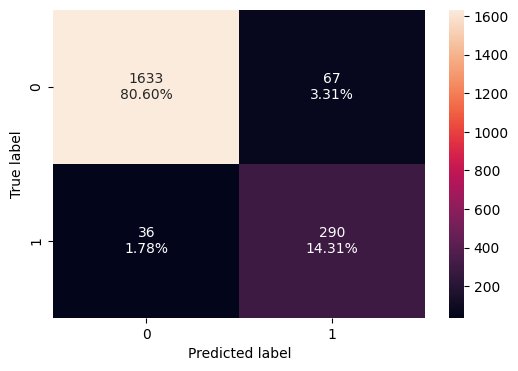

In [ ]:
confusion_matrix_sklearn(bag_tuned, X_val, Y_val)

### Tuning XGBoost with Undersampled Data

In [ ]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 2, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 0} with CV score=0.9897540554683413:


In [ ]:
randomized_cv.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb_tuned = randomized_cv.best_estimator_

In [ ]:
xgb_tuned.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Checking model's performance on training set
xgb_train = model_performance_classification_sklearn(
    xgb_tuned, X_train_un, y_train_un
)
xgb_train

,Accuracy,Recall,Precision,F1
0,0.877,0.997,0.803,0.890


In [ ]:
# Checking model's performance on validation set
xgb_val = model_performance_classification_sklearn(xgb_tuned, X_val, Y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.744,0.997,0.386,0.556


## Model Comparison and Final Model Selection

In [ ]:

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        adb_train.T,
        xgb_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "AdaBoost trained with Undersampled data",
    "XGBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,AdaBoost trained with Undersampled data,XGBoost trained with Undersampled data
Accuracy,0.991,0.961,0.877
Recall,0.995,0.961,0.997
Precision,0.987,0.960,0.803
F1,0.991,0.961,0.890


In [ ]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T,
      adb_val.T,
      xgb_val.T,
       ], axis=1,
)
models_train_comp_df.columns = [
     "Gradient boosting trained with Undersampled data",
     "AdaBoost trained with Undersampled data",
     "XGBoost trained with with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,AdaBoost trained with Undersampled data,XGBoost trained with with Undersampled data
Accuracy,0.929,0.909,0.744
Recall,0.960,0.939,0.997
Precision,0.705,0.651,0.386
F1,0.813,0.769,0.556


 * Gradient boosting trained with Undersampled data has given 93% recall on the test set
 * This performance is in line with what we achieved with this model on the train and validation sets
 * Let's proceed with Gradient boosting model


### Test set final performance

In [ ]:
gbm_test = model_performance_classification_sklearn(tuned_gbm1, X_test, Y_test)
gbm_test

,Accuracy,Recall,Precision,F1
0,0.942,0.960,0.748,0.841


In [ ]:
bag_test = model_performance_classification_sklearn(bag_tuned, X_test, Y_test)
bag_test

,Accuracy,Recall,Precision,F1
0,0.957,0.905,0.838,0.870


In [ ]:
bag_test_b = model_performance_classification_sklearn(bag_tuned_b, X_test, Y_test)
bag_test_b

,Accuracy,Recall,Precision,F1
0,0.936,0.942,0.734,0.825


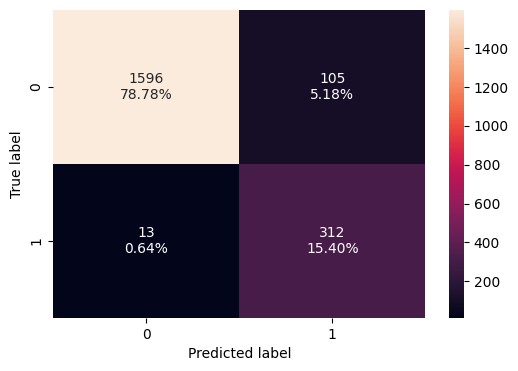

In [ ]:
confusion_matrix_sklearn(tuned_gbm1, X_test, Y_test)

Feature Importance

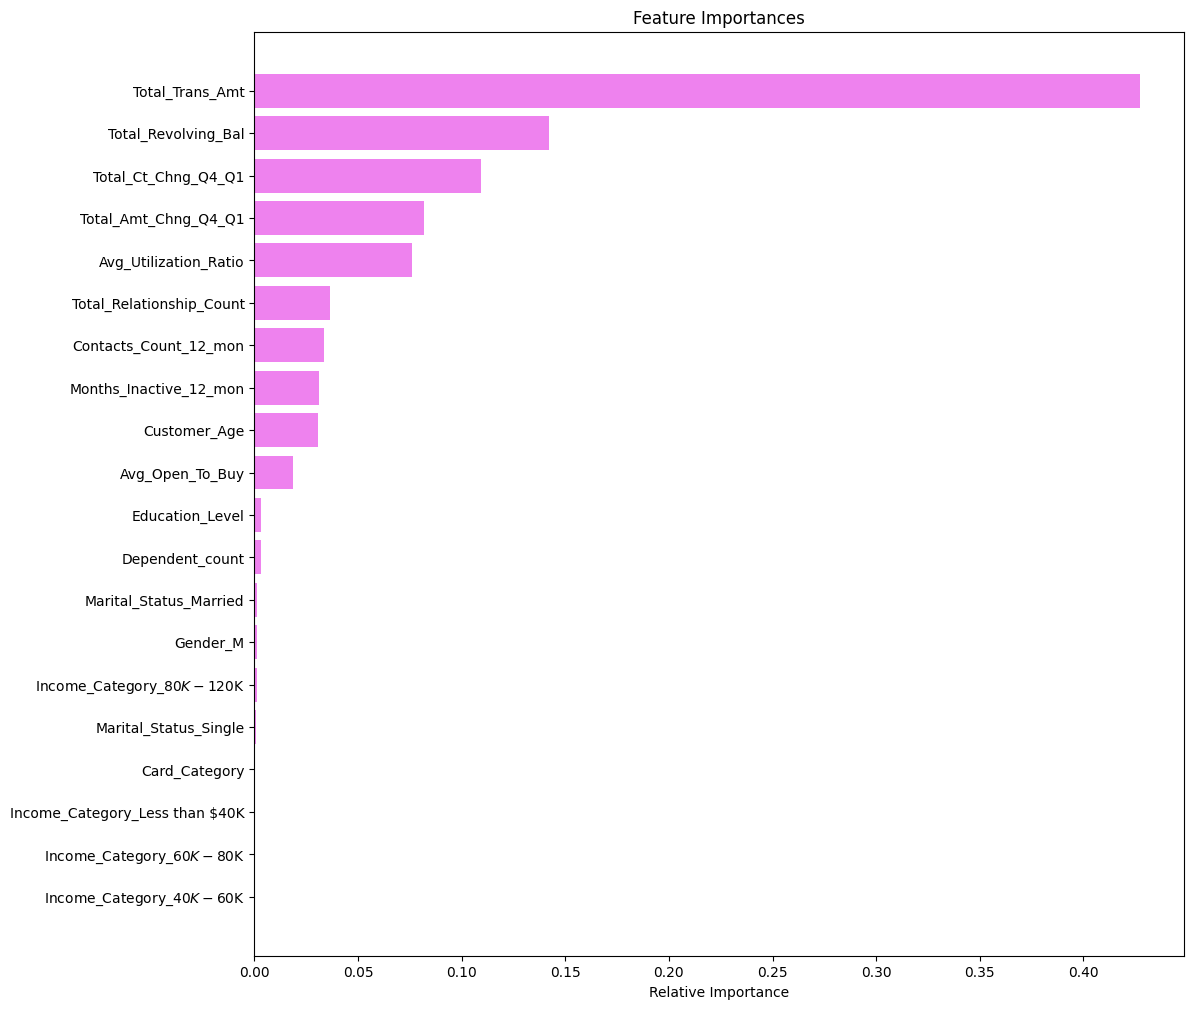

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm1.feature_importances_
indices = np.argsort(importances)[::-1]  # Reverse the order to get descending importance

# Print feature names and importances in descending order
for i in indices:
    print(f"{feature_names[i]}: {importances[i]}")

Total_Trans_Amt: 0.42732355389048987
Total_Revolving_Bal: 0.1423334443002034
Total_Ct_Chng_Q4_Q1: 0.10923987016858872
Total_Amt_Chng_Q4_Q1: 0.08191554480600766
Avg_Utilization_Ratio: 0.07600739607521113
Total_Relationship_Count: 0.036454400051977615
Contacts_Count_12_mon: 0.03383637839413512
Months_Inactive_12_mon: 0.031108326930078166
Customer_Age: 0.03086016633406773
Avg_Open_To_Buy: 0.018647902704663287
Education_Level: 0.0032033256083331997
Dependent_count: 0.003106204769513309
Marital_Status_Married: 0.0014955253610702847
Gender_M: 0.0014604924634147804
Income_Category_$80K - $120K: 0.001369463306653716
Marital_Status_Single: 0.0008035066020555237
Card_Category: 0.0002966438026417813
Income_Category_Less than $40K: 0.0002484048147808871
Income_Category_$60K - $80K: 0.00023972143609731438
Income_Category_$40K - $60K: 4.972818001643697e-05


# Business Insights and Conclusions

* The features, particularly Total_Trans_Amt and Total_Revolving_Bal, play a crucial role in predicting customer attrition.
Existing customers tend to have a higher average Total_Revolving_Bal compared to attrited customers.
* For 75% of attrited customers, the count change is lower than 0.692, indicating a potential indicator for attrition risk.
Higher attrition counts are observed among customers with 3 to 4 months of inactivity.Attrition is more likely for customers with fewer contacts in the last 12 months.
* A significant number of attrited customers have zero revolving balances.
It's crucial for the company to pay special attention to these features when formulating customer retention strategies.
* Identify customers with a history of inactivity and proactively engage them. Offer personalized incentives or services to re-engage customers who have been inactive for 3 or 4 months.
* Develop strategies to strengthen relationships with customers who have fewer total relationships.
Provide personalized services or benefits to enhance overall customer satisfactio


In [ ]:
!jupyter nbconvert  --to html "/content/drive/MyDrive/Colab Notebooks/ETMT_Project_LearnerNotebook_FullCode_1.ipynb"

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab Notebooks/ETMT_Project_LearnerNotebook_FullCode_1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompti

***